
# Customer Churn Analysis Report

## Introduction
In the competitive business environment, retaining existing customers is far more cost-effective than acquiring new ones. Understanding why customers leave and developing strategies to retain them is crucial for enhancing revenue and profitability. This analysis aims to explore the factors that contribute to customer churn and build predictive models using machine learning, focusing on both model performance and interpretability.

In this notebook, we use a variety of machine learning models, including logistic regression, decision tree classifiers, and neural networks. Each model provides insights into customer churn, enabling more targeted strategies for customer retention.

For example, logistic regression helps us understand how features like 'Credit Score' and 'Balance' contribute to customer churn, whereas decision trees can effectively capture non-linear relationships in variables like 'Number of Products' and 'Age'.



## Methodology

### Data Overview
The dataset used for this analysis contains various attributes of customers, including demographics, account information, and activity history. Key features are:
- **Age**: The age of the customer.
- **Geography**: The country of residence (e.g., France, Spain, Germany).
- **Credit Score**: A numerical value representing the customer's creditworthiness.
- **Balance**: The balance in the customer's account.
- **Number of Products**: The number of products held by the customer.
- **Active Member**: Whether the customer is an active member.
- **Exited**: The target variable, indicating if a customer has churned (1) or stayed (0).

Our objective is to predict the "Exited" variable, indicating whether a customer will churn or not.


We will employ several machine learning models, including logistic regression, decision trees, and neural networks. Each model will be tuned and evaluated to understand its strengths and weaknesses in predicting customer churn. The methodology will also involve data preprocessing, feature selection, and model evaluation to ensure optimal performance.



### Data Preprocessing
Data preprocessing steps included handling missing values, encoding categorical variables, and scaling features. These steps are essential to ensure that the models learn effectively without biases or inconsistencies:

1. **Encoding Categorical Variables**: Features like "Geography" were encoded using dummy variables allow the models to understand them.
2. **Feature Scaling**: Numerical features like "Balance" and "Credit Score" were standardized to ensure all features are on the same scale, which is particularly important for models like logistic regression and neural networks.


The data preprocessing steps are essential to ensure that our models can effectively learn patterns from the data. This includes handling missing values through imputation, encoding categorical variables to numerical form, and scaling features for consistency. Feature selection methods such as `SelectKBest` and `RFE` will also be applied to identify the most relevant features.



## Models Used

We used several machine learning models to predict customer churn:

1. **Logistic Regression**: Starting from a baseline model including all features, lostistic regression provides valuable insights to understand feature contributing to customer churn. Then, through the selection of significant features, and adjustment of classification threshold, model performance is enhanced.
2. **Decision Tree Classifier**: Leveraging the results from hyperparamter tuning, the decision tree section applies 5 models aiming to optimise recall. The use of pruning techniques, and manual parameter tuning focused on the adjustment of the complexity parameter improves decision tree performance and interpretability.
3. **Artificial Neural Network**: Two neural networks were implemented and compared to explore solutions in the deep-learning space. A best model is selected from hyperameter tuning and compared against the baseline model.Techniques such as early stopping are utlised to prevent overfitting.

Overall, the goal is to compare the performance of these models and understand their strengths and weaknesses.


# Importing Libraries

In [1]:
# necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# machine learning and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve,
    auc,
)

# necessary libraries
!pip install pandas scikit-learn torch matplotlib seaborn imbalanced-learn

# deep learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# statsmodels for statistical modeling
import statsmodels.api as sm

# imbalanced-learn for handling imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn import pipeline

# Set a random seed value for reproducibility
seed_value = 42
import random
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
from sklearn.utils import check_random_state
random_state = check_random_state(seed_value)

# Reading and Understanding the Data

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


In [5]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

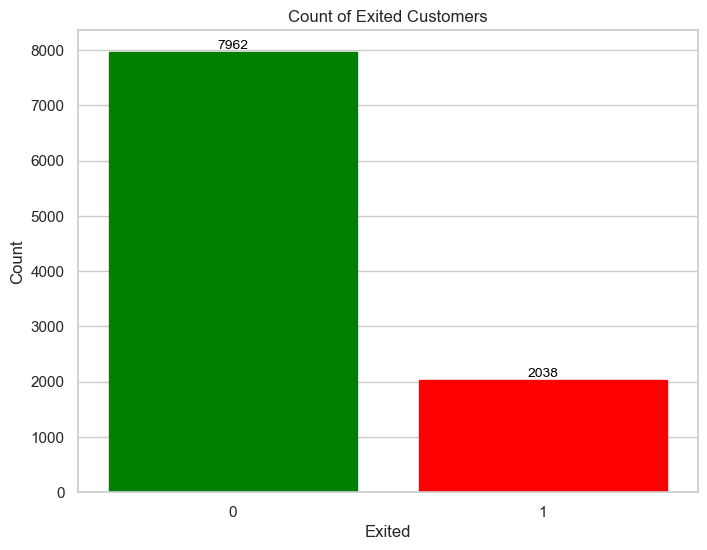

In [6]:
sns.set(style="whitegrid")  

# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))  
ax = sns.countplot(data=df, x='Exited')  
plt.title('Count of Exited Customers')  
plt.xlabel('Exited')  
plt.ylabel('Count')  

for p in ax.patches:
    if p.get_x() < 0.5:  
        p.set_color('green')
    else:  
        p.set_color('red')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## Data Cleaning

There are 1 dependent variable and 17 independent variables originally . The first step is to remove the columns for identification but not relevant to regression, including 'RowNumber', 'CustomerID' and 'Surname'. <br>
Additionally, it is necessary to check again if there is any null value that should be dropped or replaced.

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [8]:
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## Data Preparation

- The categorical features need to be converted into dummy variables, including ‘Geography’, ‘Gender’ and ‘Card Type’. 
- The dataset is split into 70% training set and 30% test set. 
- All the numerical variables are rescaled to avoid the large numbers as ‘Balance’ and ‘Estimated Salary’ affecting the model and improve accuracy. 
- Use SMOTE to balance the dataset.
- The correlation coefficient and VIF help to check the collinearity.

In [9]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
dummies = pd.get_dummies(df[cat_col], drop_first=True, dtype=int)

df = pd.concat([df, dummies], axis=1)

# Drop the original cat variables as dummies are already created
df.drop(cat_col, axis=1, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,1,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,1,0,1,0,0


In [10]:
# Separate features (X) and target variable (y)
X = df.drop(columns='Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
num_columns_list = num_col.tolist()
num_columns_list.remove("Exited")
num_col = pd.Index(num_columns_list)
numerical_columns = num_col

# Apply scaling only to the training set, then transform both training and testing sets
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [12]:
df.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Satisfaction Score      int64
Point Earned            int64
Geography_Germany       int64
Geography_Spain         int64
Gender_Male             int64
Card Type_GOLD          int64
Card Type_PLATINUM      int64
Card Type_SILVER        int64
dtype: object

In [13]:
df["Exited"].unique()

array([1, 0])


### Balancing Data Using SMOTE
The dataset is imbalanced, meaning there are more non-churners than churners. This imbalance can lead to biased models that do not effectively identify customers likely to churn. To address this, we use **SMOTE (Synthetic Minority Over-sampling Technique)**, which generates synthetic samples for the minority class, helping to balance the dataset and improve model performance.


In [14]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

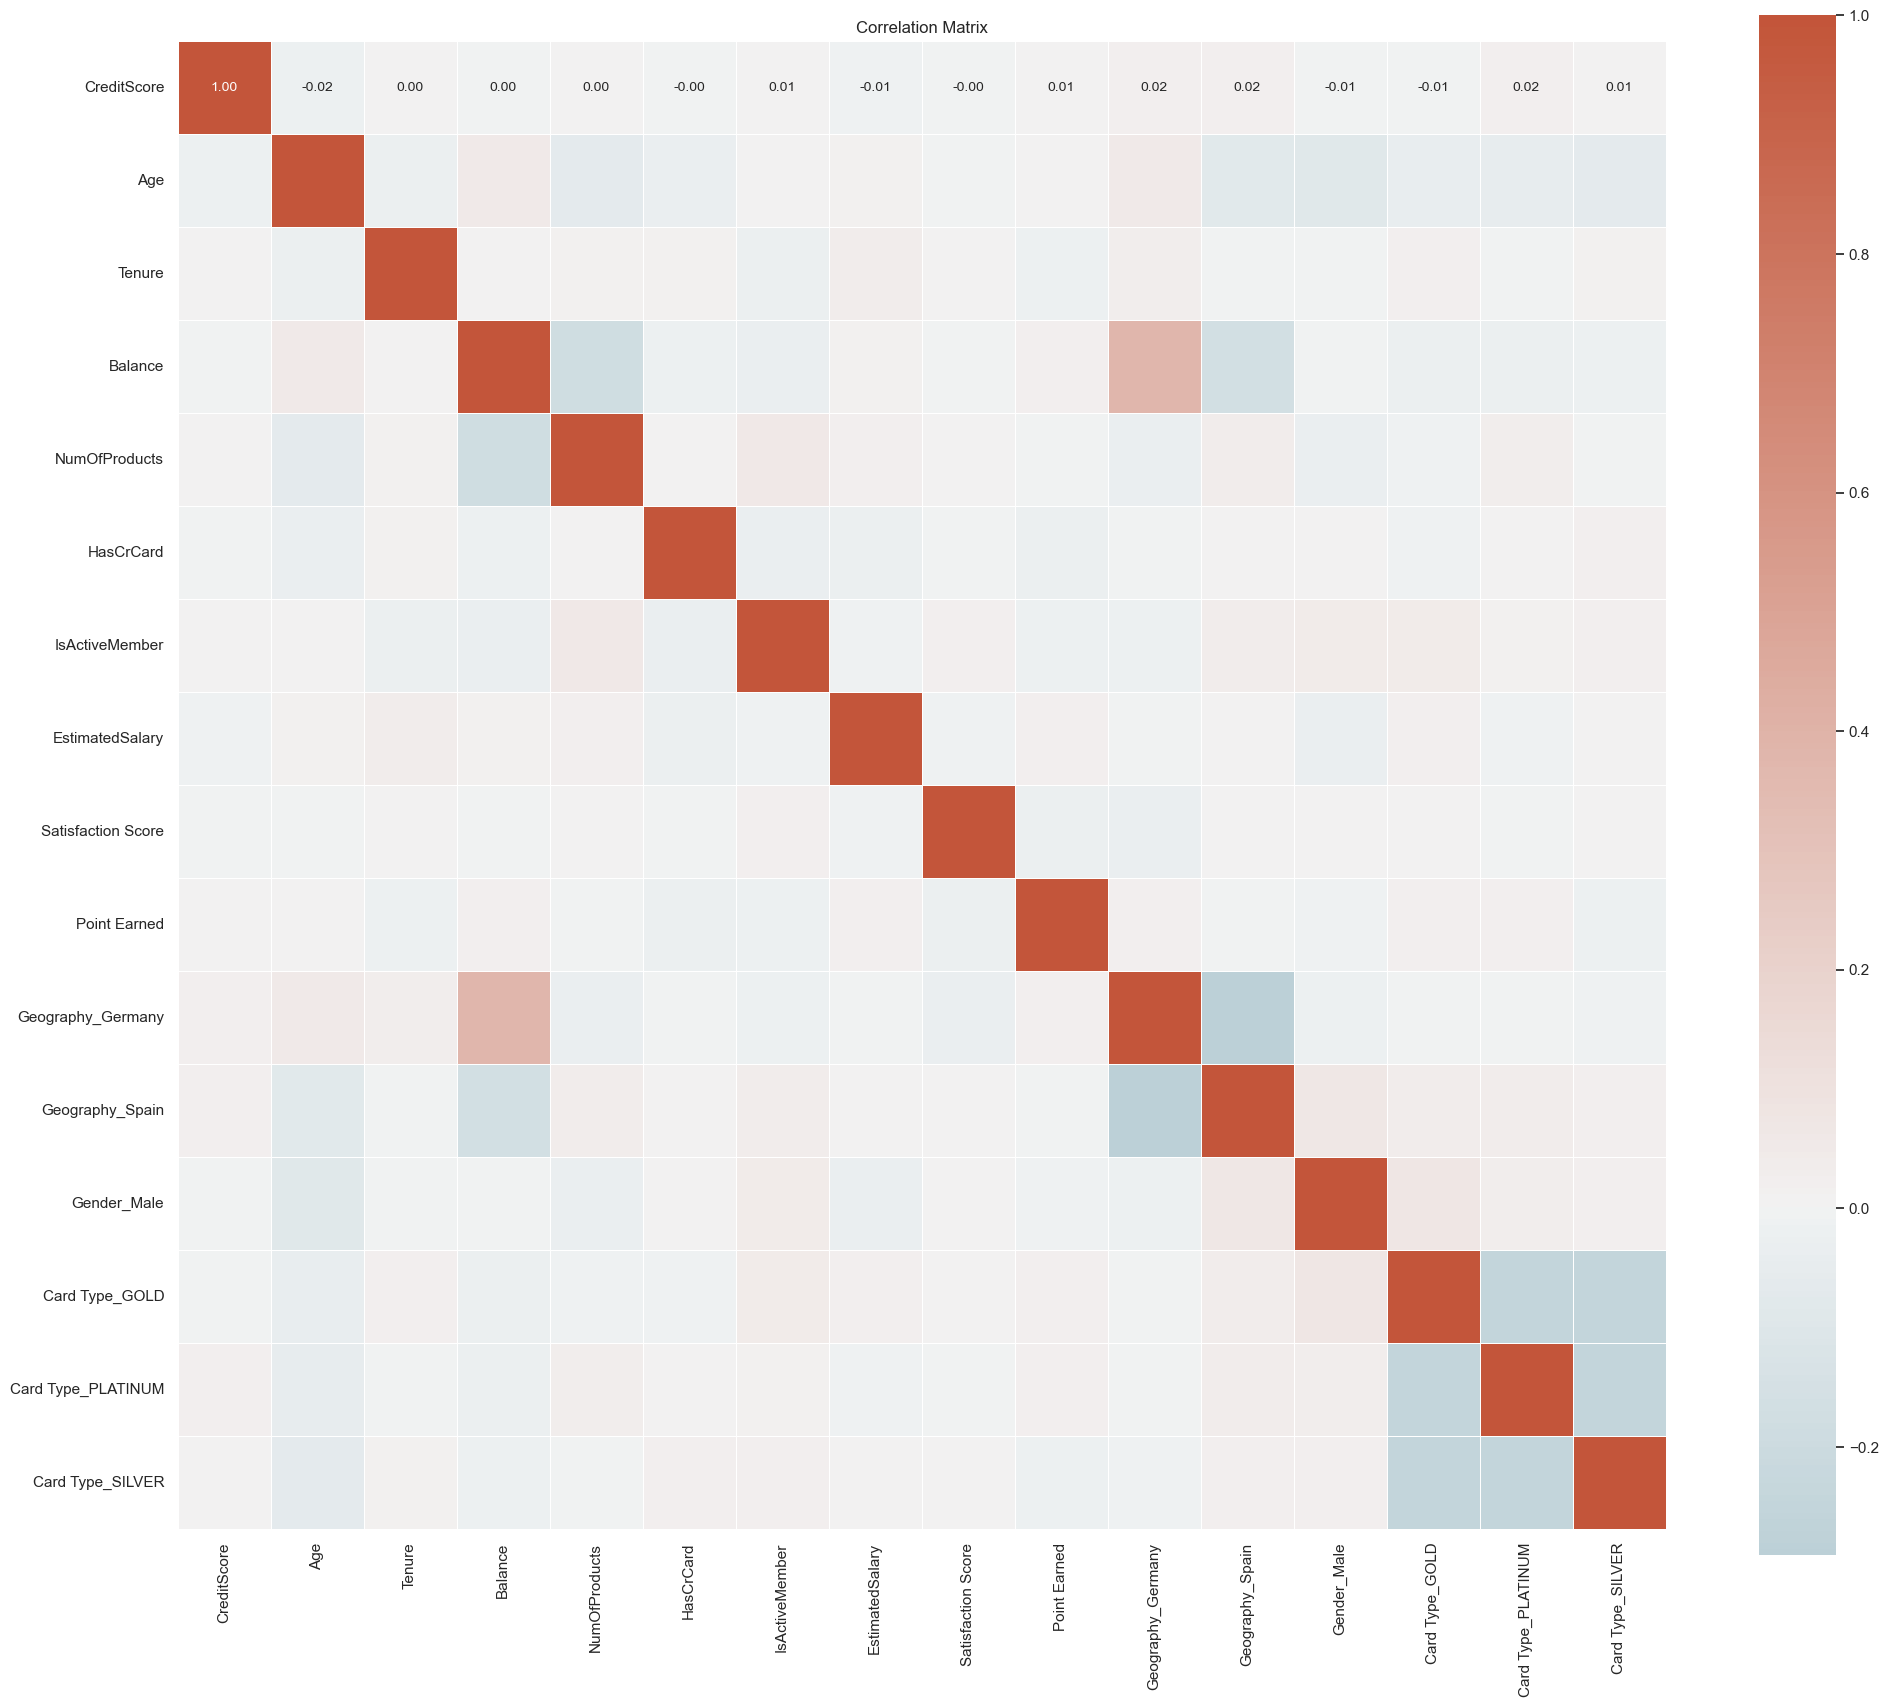

In [15]:
# correlation coefficients
plt.figure(figsize=(24, 20))
corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5, center=0)
plt.title('Correlation Matrix')
plt.show()

### Insights:

There are no 2 variables highly correlated. Excluding the dummy variables, Balance shows the most significant correlation, negatively correlated with Number of product and Geography_Spain and positively correlated with Geography_Germany. Having a higher balance is associated with having fewer credit cards and a greater likelihood of living in Germany, while being less likely to live in Spain.

In [16]:
# VIF calcualtion
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_data)


               Feature       VIF
0          CreditScore  1.001451
1                  Age  1.012168
2               Tenure  1.002522
3              Balance  1.337113
4        NumOfProducts  1.123298
5            HasCrCard  1.001899
6       IsActiveMember  1.011200
7      EstimatedSalary  1.001416
8   Satisfaction Score  1.001092
9         Point Earned  1.001164
10   Geography_Germany  1.340179
11     Geography_Spain  1.124887
12         Gender_Male  1.004586
13      Card Type_GOLD  1.501155
14  Card Type_PLATINUM  1.499618
15    Card Type_SILVER  1.499956


### Insights:

All the VIF are around 1 but not bigger than 5. It indicates that the features may have a certain degree of collinearity with other features but not severe.

# Logistic Regression Model

Logistic Regression is a fundamental statistical method used for binary classification tasks and predicts the probability of an observation belonging to a particular class. This model is well-suited for problems where the dependent variable is categorical and has two possible outcomes. It's computationally efficient and provides interpretable results.

In [17]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
y_pred_prob = model_lr.predict_proba(X_test)[:, 1]

In [18]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      2416
           1       0.37      0.59      0.45       584

    accuracy                           0.73      3000
   macro avg       0.63      0.67      0.64      3000
weighted avg       0.78      0.73      0.75      3000



In [19]:
y_pred = model_lr.predict(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test,y_pred))

print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))

Confusion Matrix:
[[1833  583]
 [ 241  343]]
Accuracy Score: 0.7253333333333334
Precision: 0.37041036717062636
Recall: 0.5873287671232876


In [20]:
# Predict on the training set
y_train_pred = model_lr.predict(X_train)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)

# Print metrics for the training set
print("\nTraining Set Metrics:")
print("Training Classification Report:\n", train_classification_report)
print("Training Confusion Matrix:\n", train_confusion_matrix)
print("Training Accuracy Score:", train_accuracy)
print("Training Precision Score:", train_precision)
print("Training Recall Score:", train_recall)


Training Set Metrics:
Training Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      5546
           1       0.75      0.75      0.75      5546

    accuracy                           0.75     11092
   macro avg       0.75      0.75      0.75     11092
weighted avg       0.75      0.75      0.75     11092

Training Confusion Matrix:
 [[4168 1378]
 [1396 4150]]
Training Accuracy Score: 0.7499098449332853
Training Precision Score: 0.7507235890014472
Training Recall Score: 0.7482870537324198


In [21]:
X_train_with_const = sm.add_constant(X_train)
model_lr = sm.Logit(y_train, X_train_with_const)
result = model_lr.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.513675
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                11092
Model:                          Logit   Df Residuals:                    11075
Method:                           MLE   Df Model:                           16
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.2589
Time:                        13:51:05   Log-Likelihood:                -5697.7
converged:                       True   LL-Null:                       -7688.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0436      0.047     22.175      0.000       0.951       1.136
Credi

In [22]:
coefficients = result.params
feature_names = X_train_with_const.columns

odds_ratios = np.exp(coefficients)

odds_ratio_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Odds Ratio': odds_ratios})
print(odds_ratio_df)

                               Feature  Coefficient  Odds Ratio
const                            const     1.043635    2.839521
CreditScore                CreditScore    -0.100656    0.904244
Age                                Age     0.871419    2.390300
Tenure                          Tenure    -0.059097    0.942616
Balance                        Balance     0.226643    1.254382
NumOfProducts            NumOfProducts    -0.102368    0.902697
HasCrCard                    HasCrCard    -0.006588    0.993433
IsActiveMember          IsActiveMember    -0.486513    0.614766
EstimatedSalary        EstimatedSalary    -0.009789    0.990258
Satisfaction Score  Satisfaction Score    -0.015561    0.984559
Point Earned              Point Earned    -0.065023    0.937046
Geography_Germany    Geography_Germany     0.232355    1.261567
Geography_Spain        Geography_Spain    -0.700618    0.496279
Gender_Male                Gender_Male    -1.058635    0.346929
Card Type_GOLD          Card Type_GOLD  

### Insight

* There are many variables which are not significant and are concluded that there is not enough statistical evidence to support the claim that these variables affect the 'Exited'.
* ‘Age’, ‘Balance’, and ‘Geography_Germany’ are positively correlated with ‘Exited’, while the other features are all negatively correlated. This shows that once the customer's age and balance are higher and he or she lives in Germany, the probability of churn becomes higher. In contrast, when other features are higher, the probability of churn will be lower as well.  
* Male customers with lower credit score, balance, estimated salary, satisfaction score and point earned,  shorter tenure, less products and activeness, no credit cards,and are living in Spain are more likely to be churn. 


* 'Age' shows the highest effective with odds ratio=2.39, indicating more than 139% increase in the odds for every unit increase in it.
* Those variables with P value bigger than 0.05 have the odds ratio  around 0.99 indicating less than 2% decrease in the odds for every unit increase in them. 

## ROC curve

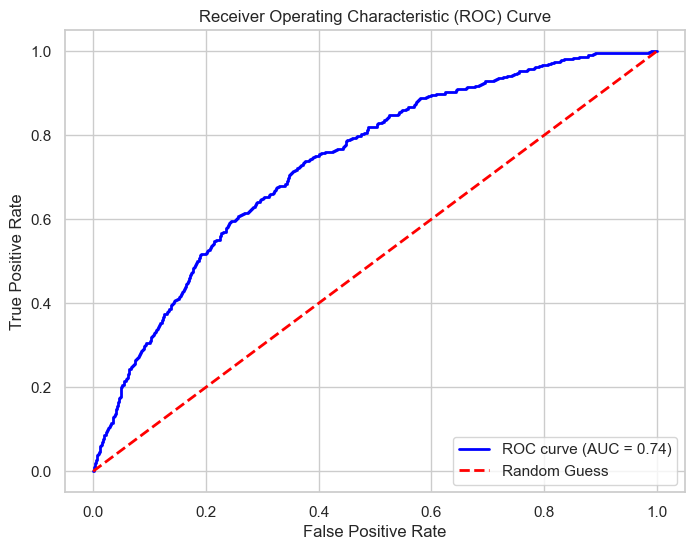

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Threshold

In [24]:
for threshold in [0.5, 0.4, 0.3]: 
    print("***** threshold:", threshold, "*****")
    y_pred_test_high = (y_pred_prob > threshold).astype(int) # probability above threshold are converted to 1
    cm_threshold = metrics.confusion_matrix(y_test, y_pred_test_high)
    print(cm_threshold)
    
    # metrics from sklearn
    print("Accuracy sklearn:", metrics.accuracy_score(y_test, y_pred_test_high))
    print("Precision sklearn:", metrics.precision_score(y_test,y_pred_test_high))
    print("Recall sklearn:", metrics.recall_score(y_test,y_pred_test_high))
    print("f1 score:", f1_score(y_test, y_pred_test_high))

***** threshold: 0.5 *****
[[1833  583]
 [ 241  343]]
Accuracy sklearn: 0.7253333333333334
Precision sklearn: 0.37041036717062636
Recall sklearn: 0.5873287671232876
f1 score: 0.4543046357615894
***** threshold: 0.4 *****
[[1554  862]
 [ 167  417]]
Accuracy sklearn: 0.657
Precision sklearn: 0.32603596559812353
Recall sklearn: 0.714041095890411
f1 score: 0.4476650563607086
***** threshold: 0.3 *****
[[1227 1189]
 [ 106  478]]
Accuracy sklearn: 0.5683333333333334
Precision sklearn: 0.28674265146970607
Recall sklearn: 0.8184931506849316
f1 score: 0.42470013327410044


### Insight:

Decreasing the threshold helps to increase the recall, but it will reduce the accuracy and the precision rate. It does not provide a better f1 score which helps to measure the model's ability to identify positive classes when the data is unbalanced, so the original model with threshold=5 is still better.

## Optimisation

Choosing the variables with P values less than 0.05 allows us to reject H0 at 5% significance level and concludes that there is enough statistical evidence to support the claim that the variables affect 'Exited'. 

In [25]:
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember','Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']
X2 = df[selected_features]
y = df['Exited']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)

# Apply scaling only to the training set, then transform both training and testing sets
scaler = StandardScaler()
X2_train[selected_features] = scaler.fit_transform(X2_train[selected_features])
X2_test[selected_features] = scaler.transform(X2_test[selected_features])

smote = SMOTE(random_state=42)
X2_train, y2_train = smote.fit_resample(X2_train, y2_train)

model_lr2 = LogisticRegression()
model_lr2.fit(X2_train, y2_train)

y2_pred = model_lr2.predict(X2_test)
y2_pred_prob = model_lr2.predict_proba(X2_test)[:, 1]

accuracy = accuracy_score(y2_test, y2_pred)
print("Classification Report:\n", classification_report(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Accuracy:", metrics.accuracy_score(y2_test,y2_pred))
print("Precision:", metrics.precision_score(y2_test,y2_pred))
print("Recall:", metrics.recall_score(y2_test,y2_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      2416
           1       0.37      0.70      0.49       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000

Confusion Matrix:
 [[1730  686]
 [ 175  409]]
Accuracy: 0.713
Precision: 0.3735159817351598
Recall: 0.7003424657534246


In [26]:
X2_train_with_const = sm.add_constant(X2_train)
model_lr2 = sm.Logit(y2_train, X2_train_with_const)
result2 = model_lr2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.569260
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                11092
Model:                          Logit   Df Residuals:                    11078
Method:                           MLE   Df Model:                           13
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.1787
Time:                        13:51:06   Log-Likelihood:                -6314.2
converged:                       True   LL-Null:                       -7688.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3213      0.023    -14.152      0.000      -0.366      -0.277
Credi

In [27]:
selected_features2 = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember','Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Card Type_GOLD']
X3 = df[selected_features2]
y = df['Exited']

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

# Apply scaling only to the training set, then transform both training and testing sets
scaler = StandardScaler()
X3_train[selected_features2] = scaler.fit_transform(X3_train[selected_features2])
X3_test[selected_features2] = scaler.transform(X3_test[selected_features2])

smote = SMOTE(random_state=42)
X3_train, y3_train = smote.fit_resample(X3_train, y3_train)

model_lr3 = LogisticRegression()
model_lr3.fit(X3_train, y3_train)

y3_pred = model_lr3.predict(X3_test)
y3_pred_prob = model_lr3.predict_proba(X3_test)[:, 1]

accuracy = accuracy_score(y3_test, y3_pred)
print("Classification Report:\n", classification_report(y3_test, y3_pred))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred))
print("Accuracy Score:", metrics.accuracy_score(y3_test,y3_pred))
print("Precision:", metrics.precision_score(y3_test,y3_pred))
print("Recall:", metrics.recall_score(y3_test,y3_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      2416
           1       0.37      0.70      0.49       584

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.64      3000
weighted avg       0.80      0.71      0.74      3000

Confusion Matrix:
 [[1728  688]
 [ 176  408]]
Accuracy Score: 0.712
Precision: 0.3722627737226277
Recall: 0.6986301369863014


In [28]:
# Predict on the training set
y3_train_pred = model_lr3.predict(X3_train)

# Calculate metrics for the training set
train3_accuracy = accuracy_score(y3_train, y3_train_pred)
train3_precision = precision_score(y3_train, y3_train_pred)
train3_recall = recall_score(y3_train, y3_train_pred)
train3_classification_report = classification_report(y3_train, y3_train_pred)
train3_confusion_matrix = confusion_matrix(y3_train, y3_train_pred)

# Print metrics for the training set
print("\nTraining Set Metrics:")
print("Training Classification Report:\n", train3_classification_report)
print("Training Confusion Matrix:\n", train3_confusion_matrix)
print("Training Accuracy Score:", train3_accuracy)
print("Training Precision Score:", train3_precision)
print("Training Recall Score:", train3_recall)


Training Set Metrics:
Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      5546
           1       0.72      0.71      0.71      5546

    accuracy                           0.71     11092
   macro avg       0.71      0.71      0.71     11092
weighted avg       0.71      0.71      0.71     11092

Training Confusion Matrix:
 [[3990 1556]
 [1616 3930]]
Training Accuracy Score: 0.714028128380815
Training Precision Score: 0.7163689391177542
Training Recall Score: 0.70861882437793


In [29]:
X3_train_with_const = sm.add_constant(X3_train)
model_lr3 = sm.Logit(y3_train, X3_train_with_const)
result3 = model_lr3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.572014
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                11092
Model:                          Logit   Df Residuals:                    11080
Method:                           MLE   Df Model:                           11
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.1748
Time:                        13:51:06   Log-Likelihood:                -6344.8
converged:                       True   LL-Null:                       -7688.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3106      0.023    -13.759      0.000      -0.355      -0.266
CreditSc

In [30]:
coefficients3 = result3.params
feature_names3 = X3_train_with_const.columns

odds_ratios3 = np.exp(coefficients3)

odds_ratio_df3 = pd.DataFrame({
    'Feature': feature_names3,
    'Coefficient': coefficients3, 
    'Odds Ratio': odds_ratios3
})
print(odds_ratio_df3)

                             Feature  Coefficient  Odds Ratio
const                          const    -0.310645    0.732974
CreditScore              CreditScore    -0.088896    0.914940
Age                              Age     0.887646    2.429405
Tenure                        Tenure    -0.072245    0.930303
Balance                      Balance     0.144201    1.155116
NumOfProducts          NumOfProducts    -0.092267    0.911862
IsActiveMember        IsActiveMember    -0.463301    0.629203
Point Earned            Point Earned    -0.069287    0.933059
Geography_Germany  Geography_Germany     0.333114    1.395307
Geography_Spain      Geography_Spain     0.056737    1.058377
Gender_Male              Gender_Male    -0.273834    0.760458
Card Type_GOLD        Card Type_GOLD    -0.085717    0.917854


### Insight:
* After filtering the variables, all the p values are less than 0.05 and reject H0 at 5% significance level and concludes that there is enough statistical evidence to support the claim that the variables affect 'Exited'. 
* 'Age' remains the most influential, which has 142% odds increase for every unit increase. 'Geography_Germany' has 40% odds increase for every unit increase. 'IsActiveMember' has 37% odds decrease for every unit increase. 'Gender_Male' has 37% odds decrease for every unit increase. The other features have less than 20% influence in the odds for every unit increase in them. 

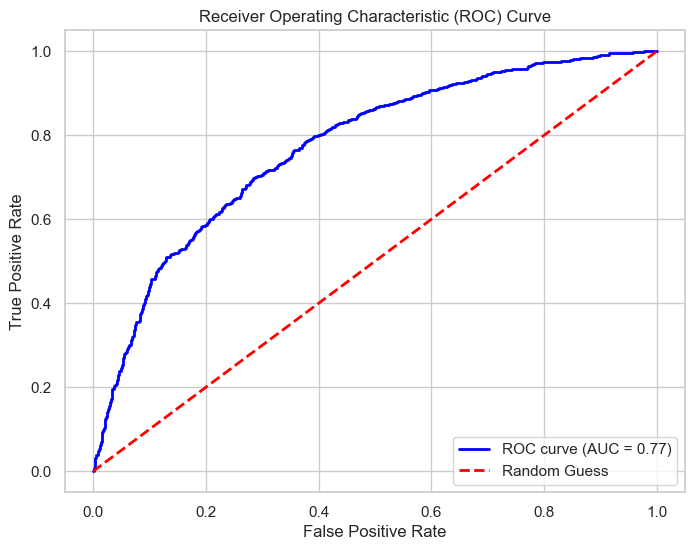

In [31]:
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred_prob)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Insight

* The accuracy is 1.3% less than the original model. 
* The precision rate is similar, but the recall rate is higher than 10%. 
* The correlation is almost consistent to the original model, except 'Geography_Spain' becoming positively correlated.
* The AUC is also better(0.74 to 0.77). 

In [32]:
 for threshold in [0.5, 0.4, 0.3]:
    print("***** threshold:", threshold, "*****")
    y3_pred_test_high = (y3_pred_prob > threshold).astype(int)
    cm_threshold = metrics.confusion_matrix(y3_test, y3_pred_test_high)
    print(cm_threshold)
    
    print("Accuracy sklearn:", metrics.accuracy_score(y3_test, y3_pred_test_high))
    print("Precision sklearn:", metrics.precision_score(y3_test,y3_pred_test_high))
    print("Recall sklearn:", metrics.recall_score(y3_test,y3_pred_test_high))
    print("f1 score:", f1_score(y3_test, y3_pred_test_high))

***** threshold: 0.5 *****
[[1728  688]
 [ 176  408]]
Accuracy sklearn: 0.712
Precision sklearn: 0.3722627737226277
Recall sklearn: 0.6986301369863014
f1 score: 0.4857142857142857
***** threshold: 0.4 *****
[[1368 1048]
 [ 101  483]]
Accuracy sklearn: 0.617
Precision sklearn: 0.3154800783801437
Recall sklearn: 0.827054794520548
f1 score: 0.45673758865248226
***** threshold: 0.3 *****
[[ 936 1480]
 [  53  531]]
Accuracy sklearn: 0.489
Precision sklearn: 0.2640477374440577
Recall sklearn: 0.9092465753424658
f1 score: 0.4092485549132948


### Insight:
When the threshold=0.5, the model retains best f1 score. The accuracy drops more than 10% and the precision rate decreases 6% to get better recall. Due to the balance of these three factors, this model without threshold adjustment(keeping threshold=0.5) is a better choice.

## Conclusion

After removing the variables whose P value is bigger than 0.05, the accuracy remains. The recall and f1-score of the optimised model is a bit higher than the original model. After changing the threshold, the lower threshold of optimised model will get the better recall but reduce accuracy and precision too much. 
Thus, the best choice is the second optimised model(model_lr3) with threshold=0.5. It decreases the variables from the original model to improve the efficiency and reduce the risk of overfitting.  

Overall, predictive modeling provides a powerful tool for understanding customer behavior and taking proactive measures to enhance customer retention. By employing a variety of models and focusing on improving their interpretability and performance, we can deliver valuable insights that directly impact business success.

## Customer Churn Analysis with Decision Trees

## Auto hyperparameter fine-tuning

#### No standardized split

In [33]:
X = df.drop(columns='Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
def plot_tree_with_feature_class(model, x_train, y_train):
    y_train_unique = y_train.unique()
    y_train_unique.sort() 
    y_train_unique = y_train_unique.astype(str) 
    fig = plt.figure(figsize=(20,20))
    _ = plot_tree(model, 
                  feature_names = x_train.columns,
                  class_names = y_train_unique,
                  filled=True)

The following piece of code comes from the web, but we did not choose to use it. Firstly, random_state is not used in the code. Therefore, the parameters of the output are different each time, which can lead to unnecessary parameters when building the model. Secondly, the small number of parameters may cause a lack of understanding of the model, which means it is not conducive to choosing the most appropriate tuning strategy. Thirdly, the narrow range of parameters may not be able to effectively capture the complexity of the model, which means it will affect the accuracy of the prediction. 

In [35]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Min Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

dtc = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 3, max_depth= 7)
dtc.fit(X_train, y_train)

Min Split:  3
Max Nvl:  9
Algorithm:  gini
Score:  0.7874216149510765


DecisionTreeClassifier(max_depth=7, min_samples_split=3)

#### The modified code 'Model 1'

{'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 9, 'min_samples_split': 5}


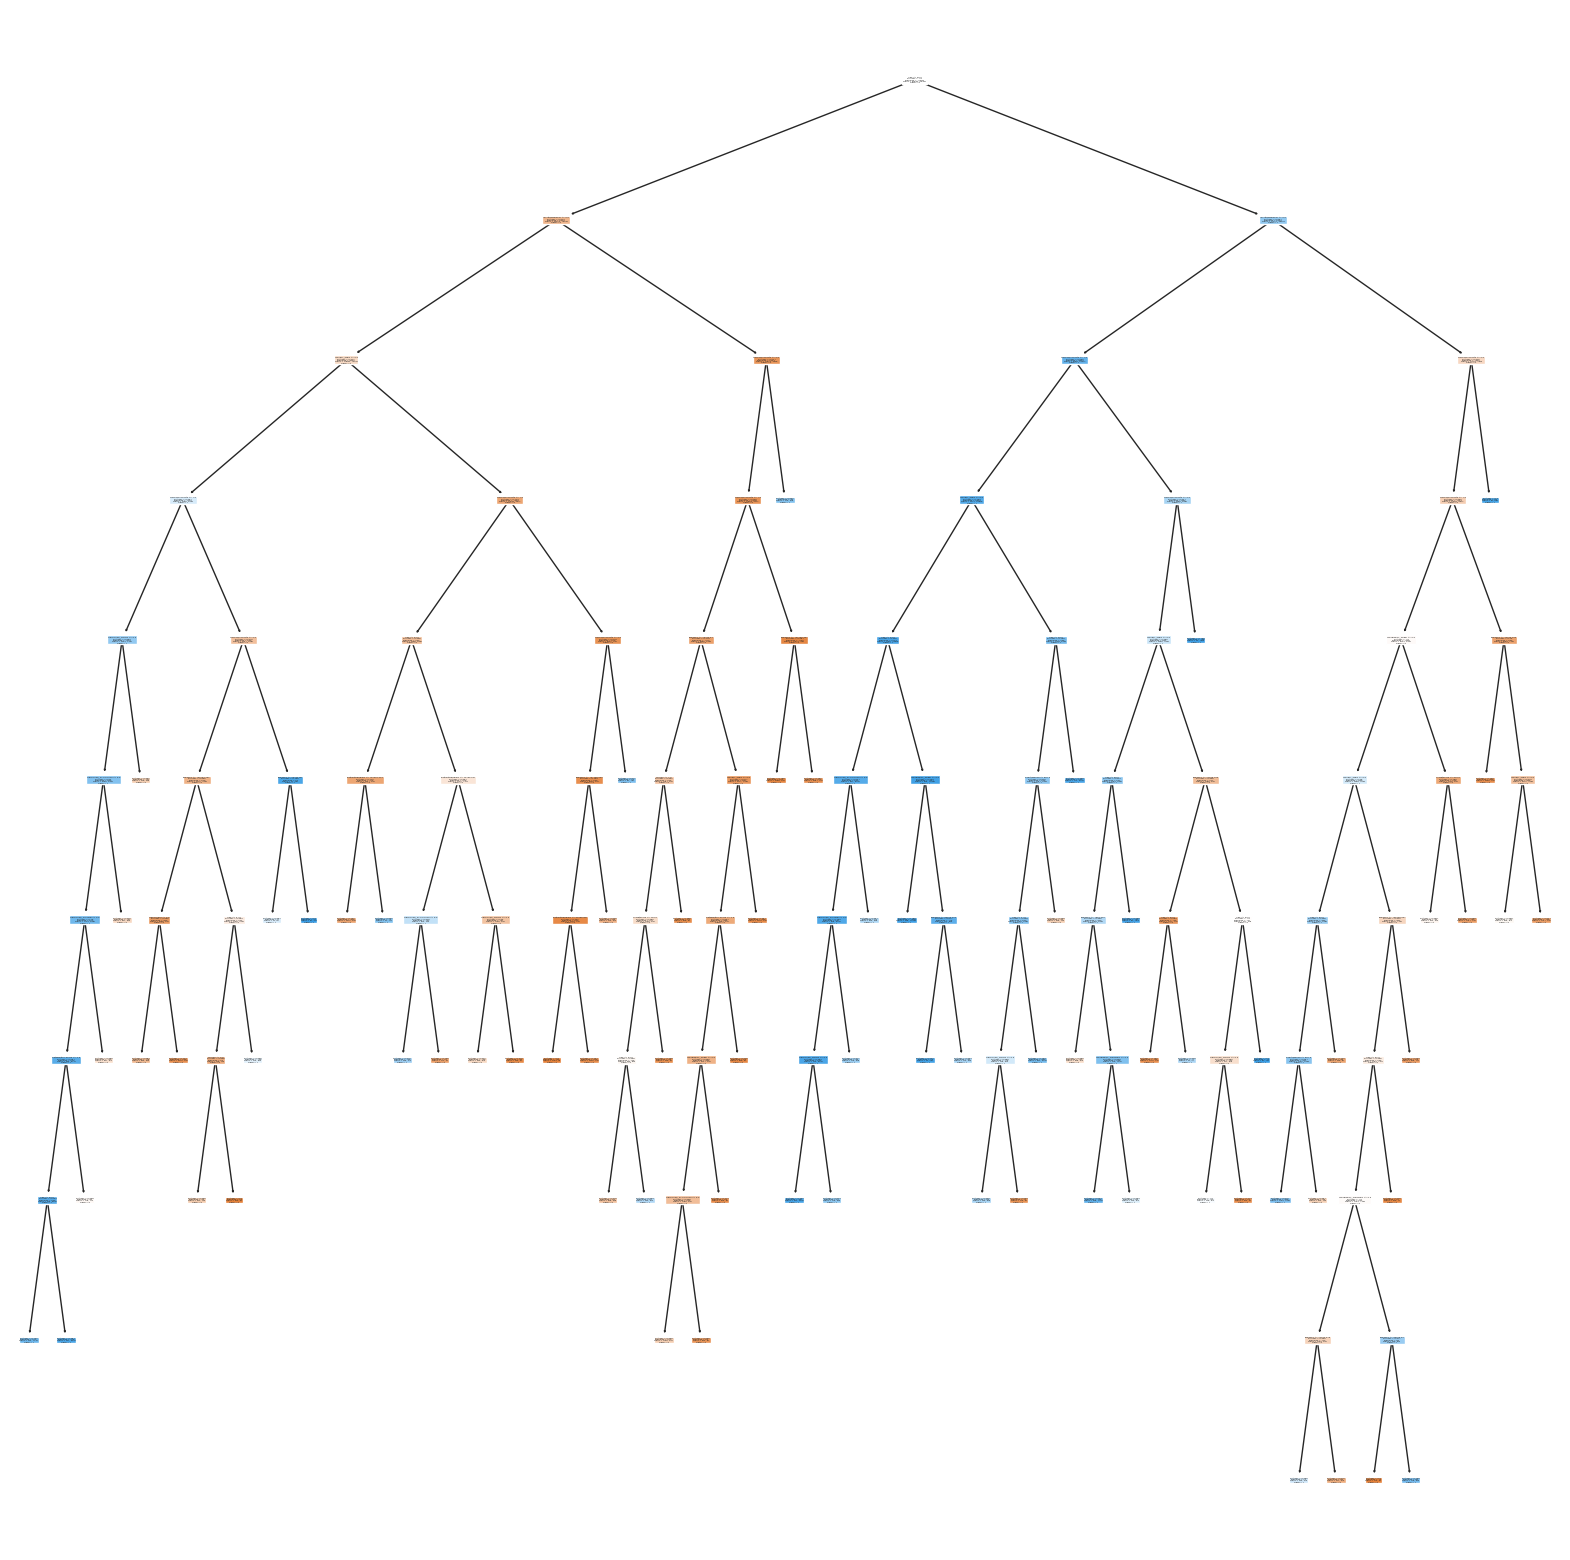

In [36]:
dtc = DecisionTreeClassifier(random_state=42)
max_depth = list(range(10,30,10))
min_samples_split = list(range(5,10))
min_samples_leaf = list(range(2,10))
min_impurity_decrease = np.arange(1,5)/1000

parameters = {'criterion':['gini','entropy'],
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'min_impurity_decrease':min_impurity_decrease}

gcv = GridSearchCV(estimator=dtc, 
                   param_grid=parameters,
                   cv=5,
                   n_jobs=-1,
                   scoring='accuracy') 
gcv.fit(X_train, y_train) 
print(gcv.best_params_) 

dtc = DecisionTreeClassifier(**gcv.best_params_) 

dtc.fit(X_train, y_train)
plot_tree_with_feature_class(dtc, X_train, y_train)

In [37]:
y_train_pred = dtc.predict(X_train)

print(metrics.confusion_matrix(y_train, y_train_pred))

print("Accuracy Score:", metrics.accuracy_score(y_train, y_train_pred))
print("Precision:", metrics.precision_score(y_train, y_train_pred))
print("Recall:", metrics.recall_score(y_train, y_train_pred))

[[4740  806]
 [1037 4509]]
Accuracy Score: 0.8338442120447169
Precision: 0.8483537158984008
Recall: 0.8130183916336098


In [38]:
y_pred = dtc.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred))

print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test,y_pred))
print("Recall:", metrics.recall_score(y_test,y_pred))

[[2027  389]
 [ 227  357]]
Accuracy Score: 0.7946666666666666
Precision: 0.4785522788203753
Recall: 0.6113013698630136


After adjusting four parameters, we found that the accuracy of the training set and the test set differed by about 3.91%. Therefore, there is no obvious overfitting phenomenon. However, the output decision tree is complexed, which makes it difficult to analyze the influence of the input variable on the target variable. Therefore, cost-complexity parameter will be increased to simplify the model. 


## Pruning 

In [39]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [40]:
from sklearn.model_selection import cross_val_score

classifiers = []

for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)

cv_scores = [np.mean(cross_val_score(i, X_train, y_train, cv = 5)) for i in classifiers]

best_alpha = ccp_alphas[np.argmax(cv_scores)]
best_alpha

0.0010752006213092195

#### Model 2

In [41]:
pruned_dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha, **gcv.best_params_)
pruned_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0010752006213092195, criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.001,
                       min_samples_leaf=9, min_samples_split=5,
                       random_state=42)

In [42]:
y_train_pred = dtc.predict(X_train)

print(metrics.confusion_matrix(y_train, y_train_pred))

print("Accuracy Score:", metrics.accuracy_score(y_train, y_train_pred))
print("Precision:", metrics.precision_score(y_train, y_train_pred))
print("Recall:", metrics.recall_score(y_train, y_train_pred))

[[4740  806]
 [1037 4509]]
Accuracy Score: 0.8338442120447169
Precision: 0.8483537158984008
Recall: 0.8130183916336098


In [43]:
y_pred_best = pruned_dtc.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred_best))

print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred_best))
print("Precision:", metrics.precision_score(y_test,y_pred_best))
print("Recall:", metrics.recall_score(y_test,y_pred_best))

[[2046  370]
 [ 233  351]]
Accuracy Score: 0.799
Precision: 0.4868238557558946
Recall: 0.601027397260274


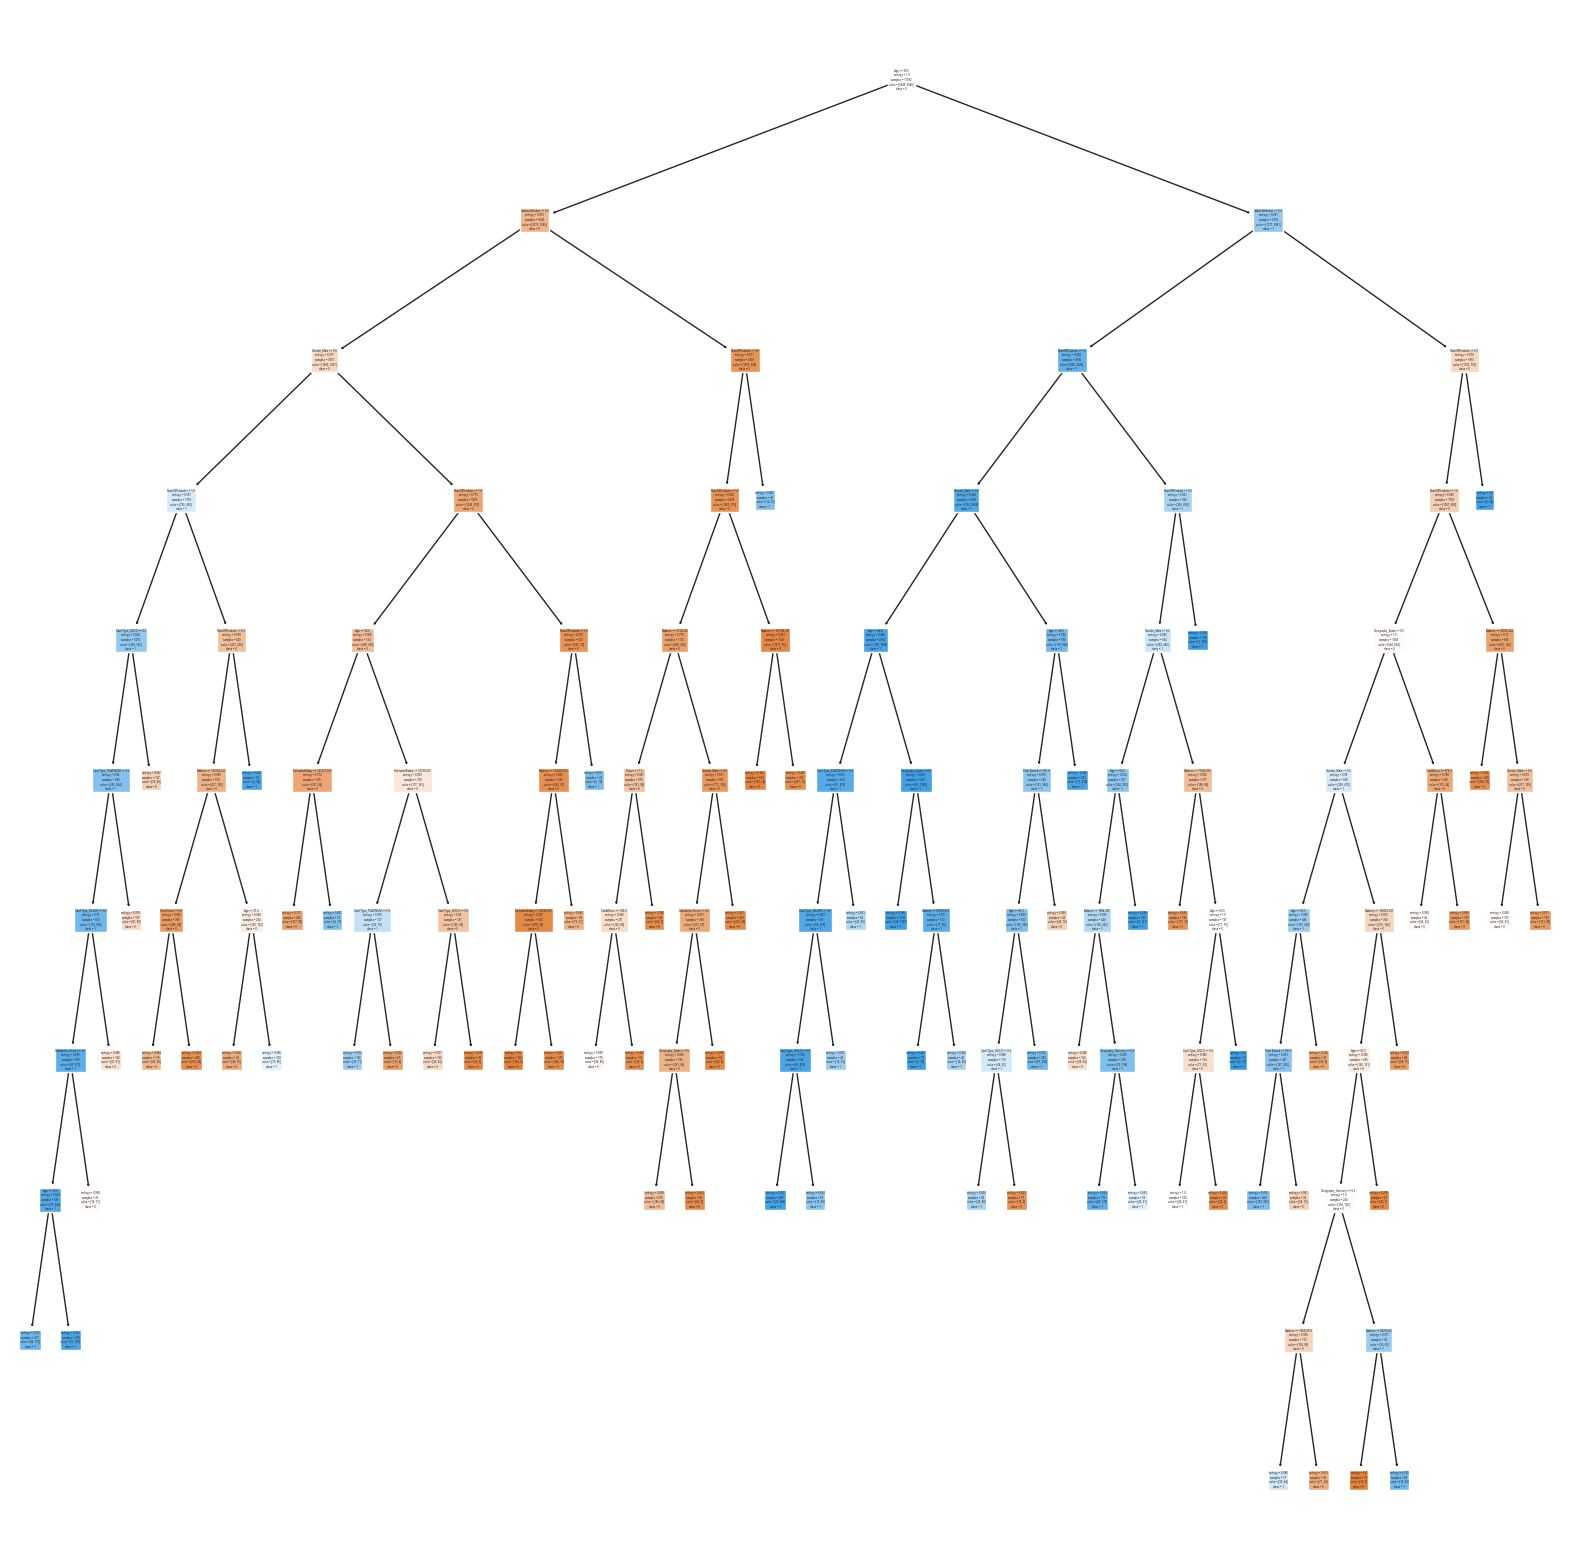

In [44]:
plot_tree_with_feature_class(pruned_dtc, X_train, y_train)

- Accuracy: The optimised model has a slight improvement in the test set, increasing by 0.43%, indicating that the overall prediction accuracy of the model has been improved.
- Precision: After optimisation, the precision increased by 0.82%, indicating that the model's prediction of lost customers was more accurate and the false positive rate was reduced after optimisation.
- Recall: The recall for the optimised model decreased slightly but did not change much (from 61.13% to 60.1%). This shows that adding the cost-complexity parameter did not improve the ability to identify churn customers. 

The performance of the optimised model has improved on the test set, especially the slight improvement in the accuracy rate, which indicates that the model has improved the accuracy of predicting the loss of customers. However, decision tree is still complex. Therefore, the next step is to adjust the cost-complexity parameter using a manual fine-tuning method. 

## Manual hyperparameter fine-tuning

#### Model 3

In [45]:
pruned_dtc=DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.001,
                       min_samples_leaf=9, min_samples_split=5,
                       random_state=42)
pruned_dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=10,
                       min_impurity_decrease=0.001, min_samples_leaf=9,
                       min_samples_split=5, random_state=42)

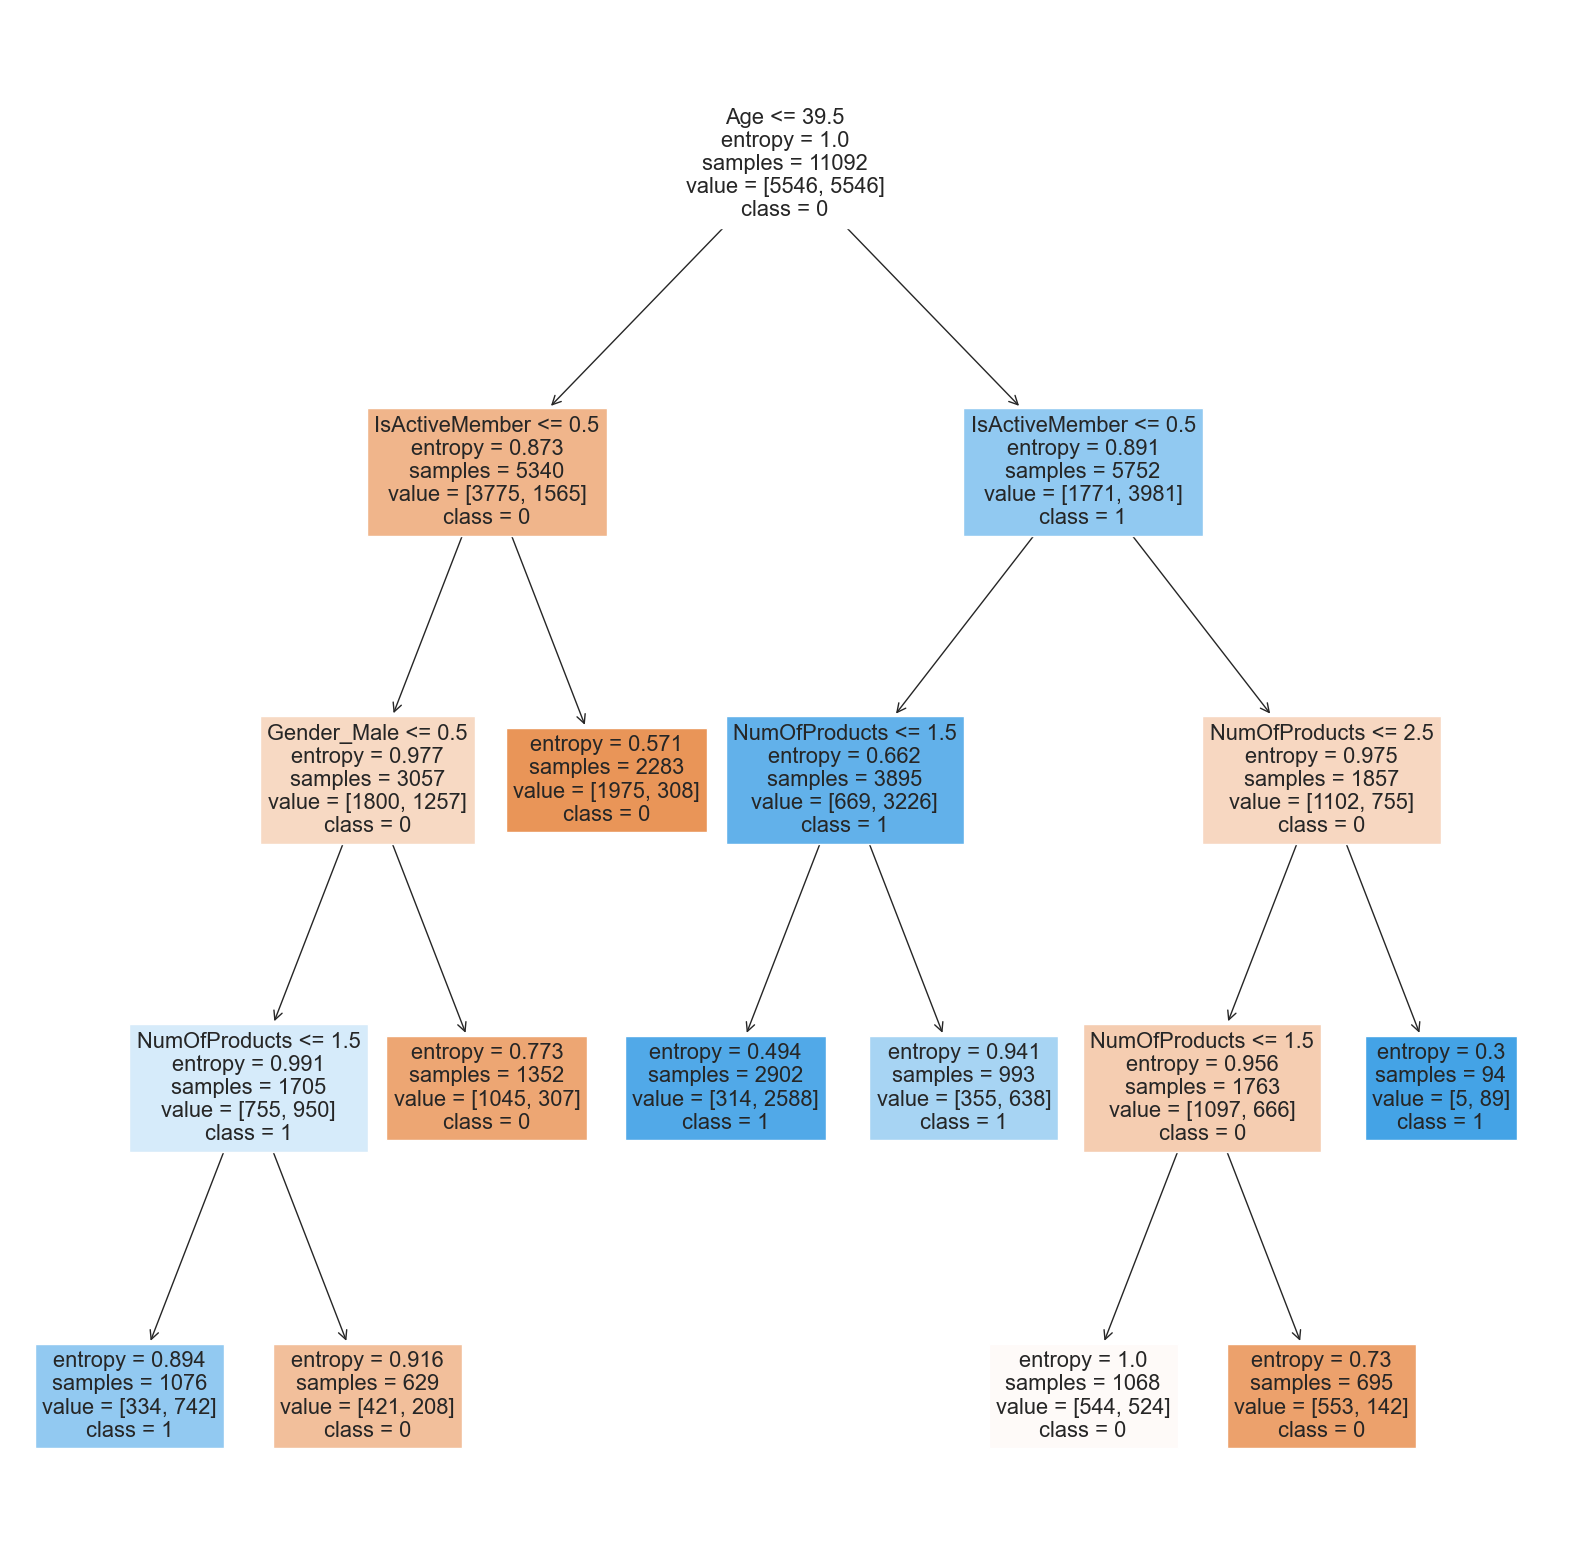

In [46]:
plot_tree_with_feature_class(pruned_dtc, X_train, y_train)

#### Breakdown of Key Splits
- Root Node - Age ≤ 39.5: The tree starts by splitting on Age, dividing customers into two major groups: younger (≤39.5) and older (>39.5). This indicates that age is key factor in differentiating customers’ likelihood to churn.
- Left Subtree (Age ≤ 39.5): For customers under the age of 39.5, the risk of churn is generally lower. Because of the active and inactive conditions of customers, the probability that customers will not lose is higher. 
- Right Subtree (Age > 39.5): Older, non-active customers are more likely to churn. A further split on NumOfProducts ≤ 1.5 results in both branches classified as class=1 (churn). This indicates a high risk of churn for older, non-active customers with low product engagement. When IsActiveMember > 0.5 and NumOfProducts ≤ 2.5, this group is classified as class=0, indicating that even moderate product engagement (up to 2.5 products) correlates with retention in older, active members. When NumOfProducts > 2.5, the group is classified as class=1. This suggests that having too many products may be associated with an increased risk of churn from older active customers due to dissatisfaction with managing multiple products. 

In [47]:
y_train_pred = pruned_dtc.predict(X_train)

print(metrics.confusion_matrix(y_train, y_train_pred))

print("Accuracy Score:", metrics.accuracy_score(y_train, y_train_pred))
print("Precision:", metrics.precision_score(y_train, y_train_pred))
print("Recall:", metrics.recall_score(y_train, y_train_pred))

[[4538 1008]
 [1489 4057]]
Accuracy Score: 0.7748827984132708
Precision: 0.8009871668311944
Recall: 0.7315182113234764


In [48]:
y_pred_best = pruned_dtc.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred_best))

print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred_best))
print("Precision:", metrics.precision_score(y_test,y_pred_best))
print("Recall:", metrics.recall_score(y_test,y_pred_best))

[[1991  425]
 [ 248  336]]
Accuracy Score: 0.7756666666666666
Precision: 0.44152431011826543
Recall: 0.5753424657534246


## Decision Tree Summary

From the decision tree, we found three key variables, which means they may have a noticeable impact on customer churn. Age is a key factor in customer churn, and older customers are more likely to churn. The second variable is IsActiveMember, active membership generally reduces the risk of membership churn across all age groups. The third variable is NumOfProducts, for older and active customers, holding up to 2.5 products was associated with a lower churn risk, while holding more than 2.5 products was surprisingly associated with a higher churn risk. This may indicate that excessive product engagement can lead to the loss of older and active customers. In conclusion, older customers with fewer products and less active customers are most likely to churn, while younger customers are generally at lower risk.



After the cost-complexity parameter is expanded to 0.009, the model with manually adjusted cost-complexity parameter improved in generalization and conciseness, but decreasing in the accuracy of predicting churn. The accuracy difference of the model with manually adjusted cost-complexity parameter on the training set and the test set is closer than that of model 2, indicating that the generalization ability of the model has been improved. Moreover, the structure of decision tree is simplified. The recall rate of the model is 57.53%, which indicates that the model has a certain effect in identifying easily churn customers, but there is still space for improvement. In the case of customer churn, missing a large percentage of churn cases (false negatives) can be costly. The increase of cost-complexity parameter restrains the overly complex branch of the model and improves the interpretability of the model. However, due to the model becomes simpler, some key branches may be overlooked, which leads to a decline in the ability to identify lost customers.

## Enhanced Model Analysis with Annotated Churn Prediction

# ANN Model 1

In [49]:
# Apply scaling only to the training set, then transform both training and testing sets
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

The first neural network ANN1 uses a fixed set of parameters: 
* 4 layers (3 hidden layer and 1 output layer) 
* Decreasing number of neurons in each layer (64->32->16->1).
* Each batch consists of 32 samples
* A total of 12 epochs are ran
* The output of each hiddend layer are passed through the ReLU activation function
* The ReLu function introduces non-linearity between layers suitable for capturing complex patterns
* Use Adam optimiser which adjusts the model's parameters to minimize the loss.
* Use early stopping with a patience of 10 epochs to avoid overfitting

In [50]:
# Convert DataFrames to NumPy arrays
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [51]:
# Put features and target varible together in a TensorDataset for traning and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create loaders to manage the loading of data in batches, with each batch contaning 32 samples.
# Smaller batch sizes (e.g., 8, 16) often lead to better generalization and can reduce the risk of overfitting.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [52]:
# Create ANN model with 4 layers (3 hidden layer and 1 output layer) with decreasing number of neurons (64->32->16->1)
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        # The output of each hiddend layer are passed through the ReLU activation function
        # The ReLu function introduces non-linearity between layers suitable for capturing complex patterns
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        # takes 16 neurons from the previous layer, and outputs a single value passed through the Sigmoid activation
        # representing the probability of the positive class in a binary classification task.
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.output(x))
        return x

Epoch [1/100], Loss: 0.4734, Val Loss: 0.4709
Epoch [2/100], Loss: 0.3677, Val Loss: 0.4292
Epoch [3/100], Loss: 0.3506, Val Loss: 0.4518
Epoch [4/100], Loss: 0.3415, Val Loss: 0.4387
Epoch [5/100], Loss: 0.3360, Val Loss: 0.4303
Epoch [6/100], Loss: 0.3318, Val Loss: 0.4466
Epoch [7/100], Loss: 0.3261, Val Loss: 0.4102
Epoch [8/100], Loss: 0.3232, Val Loss: 0.4392
Epoch [9/100], Loss: 0.3186, Val Loss: 0.4153
Epoch [10/100], Loss: 0.3161, Val Loss: 0.4245
Epoch [11/100], Loss: 0.3133, Val Loss: 0.4129
Epoch [12/100], Loss: 0.3110, Val Loss: 0.4110
Epoch [13/100], Loss: 0.3067, Val Loss: 0.4166
Epoch [14/100], Loss: 0.3053, Val Loss: 0.4452
Epoch [15/100], Loss: 0.3046, Val Loss: 0.4297
Epoch [16/100], Loss: 0.2999, Val Loss: 0.4564
Epoch [17/100], Loss: 0.2978, Val Loss: 0.4156
Early stopping!


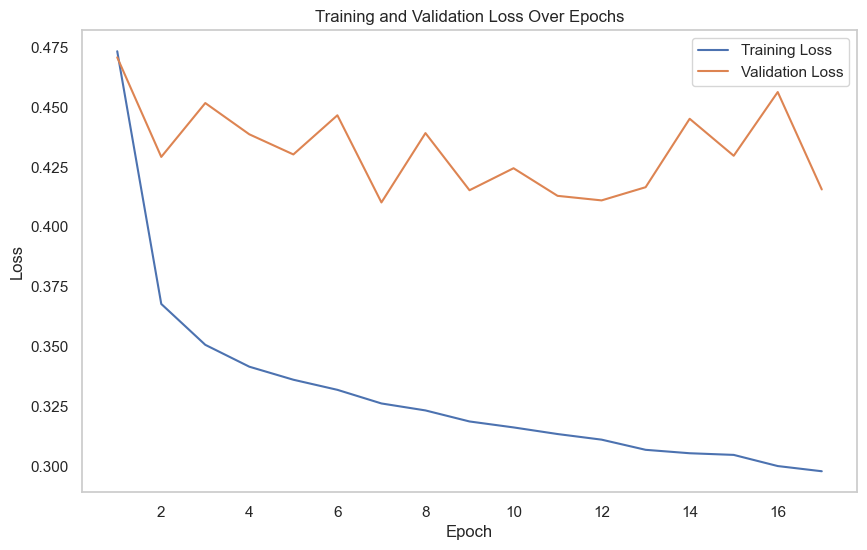

In [53]:
np.random.seed(42)

# Configure the optimizer (e.g., Adam), which adjusts the model's parameters to minimize the loss.
# Adam is chosen for its adaptive learning rate, helping reach optimal weights efficiently.
# Set up the optimizer and specify the learning rate

# Initialize the model
input_dim = X_train.shape[1]  # Number of features in the dataset
model = ANNModel(input_dim)

# Configure the optimizer and criterion
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# This sets the patience for early stopping to 10 epochs
# meaning the training will stop if the validation loss does not improve for 10 consecutive epochs.
# Early stopping avoid overfitting
best_loss = np.inf
patience = 10
trigger_times = 0


# loops through each epoch for a total of 100 epochs
num_epochs = 100

# Lists to store loss values
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate average training loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Calculate average validation loss for the epoch
    val_loss /= len(test_loader)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping logic
    if val_loss < best_loss:
        best_loss = val_loss
        best_model = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1

    if trigger_times >= patience:
        print('Early stopping!')
        model.load_state_dict(best_model)
        break

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()


# ANN1 Evaluation

The first neural network achieves a 82.77% accuracy rate, with a 56.12 % precision and 52.57% recall, indicating a higher level of true negatives then true positives. 
When trying to decrease churn, recall should be prioritised as recall represents the ability to identify all the customers who are likely to churn, helping the company take preventive action. 
Missing a true churning customer (a false negative) could mean losing that customer, which can be costly. While it’s helpful to minimize unnecessary efforts, in churn prevention, it’s generally less costly to reach out to a non-churning customer (a false positive) than to miss a churning one. 
Hence, despite the high accuracy rate, the low recall rate leaves room for improvement considering the purpose of prediciting churn.

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import torch
import pandas as pd

# Evaluate model and collect predictions
model.eval()
y_pred_list = []

with torch.no_grad():
    for inputs in X_test_tensor:
        y_pred = model(inputs)
        y_pred = torch.round(y_pred)  # Convert to binary (0 or 1)
        y_pred_list.append(y_pred.item())

# Convert predictions to integer format
y_pred_list = [int(pred) for pred in y_pred_list]

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_pred_list)
recall = recall_score(y_test, y_pred_list)
accuracy = accuracy_score(y_test, y_pred_list) * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Value': [precision, recall, accuracy]
})

# Display summary table
print(summary_table)

# Confusion matrix as a table
cm = confusion_matrix(y_test, y_pred_list)
cm_table = pd.DataFrame(cm, index=['Stay', 'Churn'], columns=['Stay', 'Churn'])

# Display confusion matrix table
print("\nConfusion Matrix:")
print(cm_table)



      Metric      Value
0  Precision   0.563869
1     Recall   0.529110
2   Accuracy  82.866667

Confusion Matrix:
       Stay  Churn
Stay   2177    239
Churn   275    309


# ANN Model 2

The second neural network uses hyperparameter tuning optmised for recall, and the best model derived have the following features:
Best parameters: {'dropout_rate': 0.2, 'epochs': 50, 'hidden_dim': 128, 'lr': 0.01}

In [55]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the custom PyTorch model class
class ChurnPredictionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, dropout_rate=0.5):
        super(ChurnPredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)

# Wrapper class for Sklearn compatibility
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_dim=32, dropout_rate=0.3, lr=0.001, epochs=10, patience=5):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.dropout_rate = dropout_rate
        self.lr = lr
        self.epochs = epochs
        self.patience = patience  # For early stopping
        self.classes_ = None
        self.model = None

    def fit(self, X, y):
        self.model = ChurnPredictionModel(self.input_dim, self.hidden_dim, self.dropout_rate)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        # Split data into training and validation sets for early stopping
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Convert data to tensors
        X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
        X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

        best_val_loss = float('inf')
        patience_counter = 0

        self.model.train()
        for epoch in range(self.epochs):
            # Training step
            optimizer.zero_grad()
            outputs = self.model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

            # Validation step
            self.model.eval()
            with torch.no_grad():
                val_outputs = self.model(X_val_tensor)
                val_loss = criterion(val_outputs, y_val_tensor)
            
            # Early stopping check
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0  # Reset the patience counter
                best_model_state = self.model.state_dict()  # Save the best model state
            else:
                patience_counter += 1

            # Print progress
            print(f"Epoch [{epoch+1}/{self.epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

            # Stop training if patience exceeded
            if patience_counter >= self.patience:
                print("Early stopping triggered.")
                break

            self.model.train()  # Set back to train mode after validation

        # Load the best model state
        self.model.load_state_dict(best_model_state)
        self.classes_ = np.unique(y)

    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X.values, dtype=torch.float32)
        with torch.no_grad():
            outputs = self.model(X_tensor)
            predictions = (outputs.numpy() > 0.5).astype(int)
        return predictions.flatten()

    def score(self, X, y):
        predictions = self.predict(X)
        return recall_score(y, predictions)  # Use recall score instead of accuracy

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_dim': [32, 64, 128],  
    'dropout_rate': [0.2, 0.3, 0.5, 0.7],  
    'lr': [0.005, 0.01, 0.02],  
    'epochs': [10, 20, 30, 50]  
}

# Define input_dim (make sure X_train is properly defined beforehand)
input_dim = X_train.shape[1]

# Initialize the PyTorchClassifier with the input dimension
pytorch_model = PyTorchClassifier(input_dim=input_dim, patience=5)  # Setting patience to 5 for early stopping

# Set up GridSearchCV with the defined parameter grid, optimize for recall
grid_search = GridSearchCV(estimator=pytorch_model, param_grid=param_grid, cv=3, scoring='recall')

# Perform hyperparameter tuning with resampled training data
grid_search.fit(X_train, y_train)

# Output the best parameters and recall score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)


Epoch [1/10], Training Loss: 0.7048, Validation Loss: 0.6857
Epoch [2/10], Training Loss: 0.6921, Validation Loss: 0.6735
Epoch [3/10], Training Loss: 0.6790, Validation Loss: 0.6618
Epoch [4/10], Training Loss: 0.6664, Validation Loss: 0.6506
Epoch [5/10], Training Loss: 0.6555, Validation Loss: 0.6397
Epoch [6/10], Training Loss: 0.6441, Validation Loss: 0.6290
Epoch [7/10], Training Loss: 0.6334, Validation Loss: 0.6185
Epoch [8/10], Training Loss: 0.6220, Validation Loss: 0.6079
Epoch [9/10], Training Loss: 0.6118, Validation Loss: 0.5974
Epoch [10/10], Training Loss: 0.6012, Validation Loss: 0.5868
Epoch [1/10], Training Loss: 0.7040, Validation Loss: 0.6891
Epoch [2/10], Training Loss: 0.6916, Validation Loss: 0.6778
Epoch [3/10], Training Loss: 0.6807, Validation Loss: 0.6670
Epoch [4/10], Training Loss: 0.6683, Validation Loss: 0.6567
Epoch [5/10], Training Loss: 0.6587, Validation Loss: 0.6469
Epoch [6/10], Training Loss: 0.6500, Validation Loss: 0.6374
Epoch [7/10], Training 

Epoch [9/10], Training Loss: 0.5417, Validation Loss: 0.5316
Epoch [10/10], Training Loss: 0.5285, Validation Loss: 0.5203
Epoch [1/10], Training Loss: 0.7031, Validation Loss: 0.6693
Epoch [2/10], Training Loss: 0.6719, Validation Loss: 0.6435
Epoch [3/10], Training Loss: 0.6451, Validation Loss: 0.6199
Epoch [4/10], Training Loss: 0.6209, Validation Loss: 0.5978
Epoch [5/10], Training Loss: 0.5979, Validation Loss: 0.5772
Epoch [6/10], Training Loss: 0.5748, Validation Loss: 0.5585
Epoch [7/10], Training Loss: 0.5574, Validation Loss: 0.5419
Epoch [8/10], Training Loss: 0.5416, Validation Loss: 0.5280
Epoch [9/10], Training Loss: 0.5273, Validation Loss: 0.5169
Epoch [10/10], Training Loss: 0.5175, Validation Loss: 0.5083
Epoch [1/10], Training Loss: 0.6810, Validation Loss: 0.6055
Epoch [2/10], Training Loss: 0.6103, Validation Loss: 0.5439
Epoch [3/10], Training Loss: 0.5480, Validation Loss: 0.4882
Epoch [4/10], Training Loss: 0.4925, Validation Loss: 0.4426
Epoch [5/10], Training

Epoch [9/20], Training Loss: 0.6209, Validation Loss: 0.6096
Epoch [10/20], Training Loss: 0.6106, Validation Loss: 0.5990
Epoch [11/20], Training Loss: 0.6002, Validation Loss: 0.5881
Epoch [12/20], Training Loss: 0.5880, Validation Loss: 0.5769
Epoch [13/20], Training Loss: 0.5779, Validation Loss: 0.5656
Epoch [14/20], Training Loss: 0.5671, Validation Loss: 0.5540
Epoch [15/20], Training Loss: 0.5548, Validation Loss: 0.5425
Epoch [16/20], Training Loss: 0.5435, Validation Loss: 0.5309
Epoch [17/20], Training Loss: 0.5313, Validation Loss: 0.5194
Epoch [18/20], Training Loss: 0.5203, Validation Loss: 0.5081
Epoch [19/20], Training Loss: 0.5091, Validation Loss: 0.4971
Epoch [20/20], Training Loss: 0.4981, Validation Loss: 0.4864
Epoch [1/20], Training Loss: 0.7073, Validation Loss: 0.6923
Epoch [2/20], Training Loss: 0.6954, Validation Loss: 0.6818
Epoch [3/20], Training Loss: 0.6846, Validation Loss: 0.6718
Epoch [4/20], Training Loss: 0.6732, Validation Loss: 0.6622
Epoch [5/20],

Epoch [9/20], Training Loss: 0.5040, Validation Loss: 0.4995
Epoch [10/20], Training Loss: 0.4989, Validation Loss: 0.4967
Epoch [11/20], Training Loss: 0.4902, Validation Loss: 0.4943
Epoch [12/20], Training Loss: 0.4862, Validation Loss: 0.4914
Epoch [13/20], Training Loss: 0.4849, Validation Loss: 0.4876
Epoch [14/20], Training Loss: 0.4804, Validation Loss: 0.4830
Epoch [15/20], Training Loss: 0.4766, Validation Loss: 0.4776
Epoch [16/20], Training Loss: 0.4731, Validation Loss: 0.4718
Epoch [17/20], Training Loss: 0.4625, Validation Loss: 0.4662
Epoch [18/20], Training Loss: 0.4591, Validation Loss: 0.4608
Epoch [19/20], Training Loss: 0.4581, Validation Loss: 0.4559
Epoch [20/20], Training Loss: 0.4538, Validation Loss: 0.4515
Epoch [1/20], Training Loss: 0.7006, Validation Loss: 0.6791
Epoch [2/20], Training Loss: 0.6812, Validation Loss: 0.6619
Epoch [3/20], Training Loss: 0.6650, Validation Loss: 0.6453
Epoch [4/20], Training Loss: 0.6473, Validation Loss: 0.6291
Epoch [5/20],

Epoch [1/20], Training Loss: 0.7007, Validation Loss: 0.6451
Epoch [2/20], Training Loss: 0.6443, Validation Loss: 0.6049
Epoch [3/20], Training Loss: 0.6015, Validation Loss: 0.5722
Epoch [4/20], Training Loss: 0.5658, Validation Loss: 0.5463
Epoch [5/20], Training Loss: 0.5401, Validation Loss: 0.5264
Epoch [6/20], Training Loss: 0.5202, Validation Loss: 0.5122
Epoch [7/20], Training Loss: 0.5071, Validation Loss: 0.5027
Epoch [8/20], Training Loss: 0.4983, Validation Loss: 0.4961
Epoch [9/20], Training Loss: 0.4931, Validation Loss: 0.4905
Epoch [10/20], Training Loss: 0.4820, Validation Loss: 0.4846
Epoch [11/20], Training Loss: 0.4754, Validation Loss: 0.4778
Epoch [12/20], Training Loss: 0.4668, Validation Loss: 0.4701
Epoch [13/20], Training Loss: 0.4586, Validation Loss: 0.4617
Epoch [14/20], Training Loss: 0.4548, Validation Loss: 0.4532
Epoch [15/20], Training Loss: 0.4480, Validation Loss: 0.4451
Epoch [16/20], Training Loss: 0.4405, Validation Loss: 0.4376
Epoch [17/20], Tr

Epoch [1/20], Training Loss: 0.7000, Validation Loss: 0.5952
Epoch [2/20], Training Loss: 0.5933, Validation Loss: 0.5149
Epoch [3/20], Training Loss: 0.5130, Validation Loss: 0.4549
Epoch [4/20], Training Loss: 0.4521, Validation Loss: 0.4165
Epoch [5/20], Training Loss: 0.4109, Validation Loss: 0.3942
Epoch [6/20], Training Loss: 0.3869, Validation Loss: 0.3797
Epoch [7/20], Training Loss: 0.3672, Validation Loss: 0.3674
Epoch [8/20], Training Loss: 0.3521, Validation Loss: 0.3559
Epoch [9/20], Training Loss: 0.3392, Validation Loss: 0.3449
Epoch [10/20], Training Loss: 0.3255, Validation Loss: 0.3347
Epoch [11/20], Training Loss: 0.3173, Validation Loss: 0.3251
Epoch [12/20], Training Loss: 0.3068, Validation Loss: 0.3160
Epoch [13/20], Training Loss: 0.2978, Validation Loss: 0.3066
Epoch [14/20], Training Loss: 0.2870, Validation Loss: 0.2970
Epoch [15/20], Training Loss: 0.2801, Validation Loss: 0.2880
Epoch [16/20], Training Loss: 0.2720, Validation Loss: 0.2799
Epoch [17/20], Tr

Epoch [1/30], Training Loss: 0.7018, Validation Loss: 0.6813
Epoch [2/30], Training Loss: 0.6794, Validation Loss: 0.6614
Epoch [3/30], Training Loss: 0.6594, Validation Loss: 0.6428
Epoch [4/30], Training Loss: 0.6395, Validation Loss: 0.6251
Epoch [5/30], Training Loss: 0.6218, Validation Loss: 0.6081
Epoch [6/30], Training Loss: 0.6043, Validation Loss: 0.5919
Epoch [7/30], Training Loss: 0.5878, Validation Loss: 0.5766
Epoch [8/30], Training Loss: 0.5734, Validation Loss: 0.5625
Epoch [9/30], Training Loss: 0.5571, Validation Loss: 0.5497
Epoch [10/30], Training Loss: 0.5451, Validation Loss: 0.5384
Epoch [11/30], Training Loss: 0.5354, Validation Loss: 0.5283
Epoch [12/30], Training Loss: 0.5252, Validation Loss: 0.5196
Epoch [13/30], Training Loss: 0.5133, Validation Loss: 0.5120
Epoch [14/30], Training Loss: 0.5095, Validation Loss: 0.5053
Epoch [15/30], Training Loss: 0.4987, Validation Loss: 0.4994
Epoch [16/30], Training Loss: 0.4936, Validation Loss: 0.4941
Epoch [17/30], Tr

Epoch [9/30], Training Loss: 0.5921, Validation Loss: 0.5792
Epoch [10/30], Training Loss: 0.5826, Validation Loss: 0.5700
Epoch [11/30], Training Loss: 0.5740, Validation Loss: 0.5613
Epoch [12/30], Training Loss: 0.5666, Validation Loss: 0.5532
Epoch [13/30], Training Loss: 0.5581, Validation Loss: 0.5456
Epoch [14/30], Training Loss: 0.5492, Validation Loss: 0.5385
Epoch [15/30], Training Loss: 0.5423, Validation Loss: 0.5319
Epoch [16/30], Training Loss: 0.5350, Validation Loss: 0.5257
Epoch [17/30], Training Loss: 0.5297, Validation Loss: 0.5200
Epoch [18/30], Training Loss: 0.5242, Validation Loss: 0.5147
Epoch [19/30], Training Loss: 0.5171, Validation Loss: 0.5098
Epoch [20/30], Training Loss: 0.5107, Validation Loss: 0.5052
Epoch [21/30], Training Loss: 0.5053, Validation Loss: 0.5009
Epoch [22/30], Training Loss: 0.5020, Validation Loss: 0.4969
Epoch [23/30], Training Loss: 0.4954, Validation Loss: 0.4931
Epoch [24/30], Training Loss: 0.4926, Validation Loss: 0.4896
Epoch [25

Epoch [18/30], Training Loss: 0.4286, Validation Loss: 0.4187
Epoch [19/30], Training Loss: 0.4271, Validation Loss: 0.4143
Epoch [20/30], Training Loss: 0.4182, Validation Loss: 0.4104
Epoch [21/30], Training Loss: 0.4199, Validation Loss: 0.4070
Epoch [22/30], Training Loss: 0.4167, Validation Loss: 0.4038
Epoch [23/30], Training Loss: 0.4105, Validation Loss: 0.4005
Epoch [24/30], Training Loss: 0.4094, Validation Loss: 0.3971
Epoch [25/30], Training Loss: 0.4085, Validation Loss: 0.3936
Epoch [26/30], Training Loss: 0.4040, Validation Loss: 0.3901
Epoch [27/30], Training Loss: 0.3996, Validation Loss: 0.3867
Epoch [28/30], Training Loss: 0.3973, Validation Loss: 0.3835
Epoch [29/30], Training Loss: 0.3955, Validation Loss: 0.3807
Epoch [30/30], Training Loss: 0.3923, Validation Loss: 0.3783
Epoch [1/30], Training Loss: 0.7144, Validation Loss: 0.6538
Epoch [2/30], Training Loss: 0.6533, Validation Loss: 0.6083
Epoch [3/30], Training Loss: 0.6092, Validation Loss: 0.5733
Epoch [4/30

Epoch [29/30], Training Loss: 0.2638, Validation Loss: 0.2729
Epoch [30/30], Training Loss: 0.2566, Validation Loss: 0.2704
Epoch [1/30], Training Loss: 0.6960, Validation Loss: 0.6515
Epoch [2/30], Training Loss: 0.6506, Validation Loss: 0.6156
Epoch [3/30], Training Loss: 0.6156, Validation Loss: 0.5866
Epoch [4/30], Training Loss: 0.5879, Validation Loss: 0.5625
Epoch [5/30], Training Loss: 0.5624, Validation Loss: 0.5430
Epoch [6/30], Training Loss: 0.5456, Validation Loss: 0.5275
Epoch [7/30], Training Loss: 0.5281, Validation Loss: 0.5153
Epoch [8/30], Training Loss: 0.5163, Validation Loss: 0.5053
Epoch [9/30], Training Loss: 0.5033, Validation Loss: 0.4967
Epoch [10/30], Training Loss: 0.4957, Validation Loss: 0.4889
Epoch [11/30], Training Loss: 0.4886, Validation Loss: 0.4817
Epoch [12/30], Training Loss: 0.4820, Validation Loss: 0.4751
Epoch [13/30], Training Loss: 0.4731, Validation Loss: 0.4693
Epoch [14/30], Training Loss: 0.4694, Validation Loss: 0.4643
Epoch [15/30], Tr

Epoch [13/30], Training Loss: 0.4300, Validation Loss: 0.4263
Epoch [14/30], Training Loss: 0.4198, Validation Loss: 0.4201
Epoch [15/30], Training Loss: 0.4154, Validation Loss: 0.4160
Epoch [16/30], Training Loss: 0.4131, Validation Loss: 0.4127
Epoch [17/30], Training Loss: 0.4086, Validation Loss: 0.4088
Epoch [18/30], Training Loss: 0.4078, Validation Loss: 0.4050
Epoch [19/30], Training Loss: 0.4014, Validation Loss: 0.4008
Epoch [20/30], Training Loss: 0.3952, Validation Loss: 0.3969
Epoch [21/30], Training Loss: 0.3893, Validation Loss: 0.3938
Epoch [22/30], Training Loss: 0.3855, Validation Loss: 0.3917
Epoch [23/30], Training Loss: 0.3849, Validation Loss: 0.3904
Epoch [24/30], Training Loss: 0.3836, Validation Loss: 0.3896
Epoch [25/30], Training Loss: 0.3820, Validation Loss: 0.3884
Epoch [26/30], Training Loss: 0.3798, Validation Loss: 0.3866
Epoch [27/30], Training Loss: 0.3769, Validation Loss: 0.3848
Epoch [28/30], Training Loss: 0.3789, Validation Loss: 0.3833
Epoch [2

Epoch [31/50], Training Loss: 0.4936, Validation Loss: 0.4925
Epoch [32/50], Training Loss: 0.4941, Validation Loss: 0.4895
Epoch [33/50], Training Loss: 0.4873, Validation Loss: 0.4867
Epoch [34/50], Training Loss: 0.4842, Validation Loss: 0.4841
Epoch [35/50], Training Loss: 0.4821, Validation Loss: 0.4816
Epoch [36/50], Training Loss: 0.4784, Validation Loss: 0.4793
Epoch [37/50], Training Loss: 0.4773, Validation Loss: 0.4771
Epoch [38/50], Training Loss: 0.4762, Validation Loss: 0.4750
Epoch [39/50], Training Loss: 0.4727, Validation Loss: 0.4730
Epoch [40/50], Training Loss: 0.4725, Validation Loss: 0.4711
Epoch [41/50], Training Loss: 0.4696, Validation Loss: 0.4693
Epoch [42/50], Training Loss: 0.4684, Validation Loss: 0.4676
Epoch [43/50], Training Loss: 0.4677, Validation Loss: 0.4658
Epoch [44/50], Training Loss: 0.4710, Validation Loss: 0.4641
Epoch [45/50], Training Loss: 0.4611, Validation Loss: 0.4623
Epoch [46/50], Training Loss: 0.4604, Validation Loss: 0.4605
Epoch [4

Epoch [30/50], Training Loss: 0.2788, Validation Loss: 0.2803
Epoch [31/50], Training Loss: 0.2740, Validation Loss: 0.2770
Epoch [32/50], Training Loss: 0.2698, Validation Loss: 0.2742
Epoch [33/50], Training Loss: 0.2714, Validation Loss: 0.2719
Epoch [34/50], Training Loss: 0.2689, Validation Loss: 0.2700
Epoch [35/50], Training Loss: 0.2661, Validation Loss: 0.2684
Epoch [36/50], Training Loss: 0.2649, Validation Loss: 0.2671
Epoch [37/50], Training Loss: 0.2622, Validation Loss: 0.2660
Epoch [38/50], Training Loss: 0.2629, Validation Loss: 0.2651
Epoch [39/50], Training Loss: 0.2585, Validation Loss: 0.2643
Epoch [40/50], Training Loss: 0.2660, Validation Loss: 0.2634
Epoch [41/50], Training Loss: 0.2604, Validation Loss: 0.2625
Epoch [42/50], Training Loss: 0.2580, Validation Loss: 0.2615
Epoch [43/50], Training Loss: 0.2616, Validation Loss: 0.2604
Epoch [44/50], Training Loss: 0.2573, Validation Loss: 0.2592
Epoch [45/50], Training Loss: 0.2556, Validation Loss: 0.2580
Epoch [4

Epoch [1/50], Training Loss: 0.6922, Validation Loss: 0.6777
Epoch [2/50], Training Loss: 0.6789, Validation Loss: 0.6651
Epoch [3/50], Training Loss: 0.6673, Validation Loss: 0.6534
Epoch [4/50], Training Loss: 0.6549, Validation Loss: 0.6423
Epoch [5/50], Training Loss: 0.6437, Validation Loss: 0.6317
Epoch [6/50], Training Loss: 0.6336, Validation Loss: 0.6213
Epoch [7/50], Training Loss: 0.6214, Validation Loss: 0.6112
Epoch [8/50], Training Loss: 0.6118, Validation Loss: 0.6014
Epoch [9/50], Training Loss: 0.6011, Validation Loss: 0.5919
Epoch [10/50], Training Loss: 0.5928, Validation Loss: 0.5826
Epoch [11/50], Training Loss: 0.5836, Validation Loss: 0.5735
Epoch [12/50], Training Loss: 0.5744, Validation Loss: 0.5648
Epoch [13/50], Training Loss: 0.5660, Validation Loss: 0.5563
Epoch [14/50], Training Loss: 0.5565, Validation Loss: 0.5482
Epoch [15/50], Training Loss: 0.5490, Validation Loss: 0.5403
Epoch [16/50], Training Loss: 0.5422, Validation Loss: 0.5328
Epoch [17/50], Tr

Epoch [45/50], Training Loss: 0.3951, Validation Loss: 0.3851
Epoch [46/50], Training Loss: 0.3961, Validation Loss: 0.3838
Epoch [47/50], Training Loss: 0.3978, Validation Loss: 0.3826
Epoch [48/50], Training Loss: 0.3987, Validation Loss: 0.3816
Epoch [49/50], Training Loss: 0.3930, Validation Loss: 0.3807
Epoch [50/50], Training Loss: 0.3964, Validation Loss: 0.3797
Epoch [1/50], Training Loss: 0.7044, Validation Loss: 0.6677
Epoch [2/50], Training Loss: 0.6686, Validation Loss: 0.6388
Epoch [3/50], Training Loss: 0.6417, Validation Loss: 0.6155
Epoch [4/50], Training Loss: 0.6202, Validation Loss: 0.5953
Epoch [5/50], Training Loss: 0.5993, Validation Loss: 0.5776
Epoch [6/50], Training Loss: 0.5814, Validation Loss: 0.5620
Epoch [7/50], Training Loss: 0.5635, Validation Loss: 0.5485
Epoch [8/50], Training Loss: 0.5495, Validation Loss: 0.5372
Epoch [9/50], Training Loss: 0.5367, Validation Loss: 0.5279
Epoch [10/50], Training Loss: 0.5257, Validation Loss: 0.5204
Epoch [11/50], Tr

Epoch [38/50], Training Loss: 0.3865, Validation Loss: 0.3853
Epoch [39/50], Training Loss: 0.3829, Validation Loss: 0.3841
Epoch [40/50], Training Loss: 0.3865, Validation Loss: 0.3832
Epoch [41/50], Training Loss: 0.3829, Validation Loss: 0.3825
Epoch [42/50], Training Loss: 0.3811, Validation Loss: 0.3821
Epoch [43/50], Training Loss: 0.3813, Validation Loss: 0.3819
Epoch [44/50], Training Loss: 0.3818, Validation Loss: 0.3817
Epoch [45/50], Training Loss: 0.3793, Validation Loss: 0.3814
Epoch [46/50], Training Loss: 0.3774, Validation Loss: 0.3807
Epoch [47/50], Training Loss: 0.3769, Validation Loss: 0.3802
Epoch [48/50], Training Loss: 0.3771, Validation Loss: 0.3798
Epoch [49/50], Training Loss: 0.3751, Validation Loss: 0.3797
Epoch [50/50], Training Loss: 0.3775, Validation Loss: 0.3797
Epoch [1/50], Training Loss: 0.7231, Validation Loss: 0.6854
Epoch [2/50], Training Loss: 0.6874, Validation Loss: 0.6527
Epoch [3/50], Training Loss: 0.6568, Validation Loss: 0.6233
Epoch [4/50

Epoch [37/50], Training Loss: 0.4248, Validation Loss: 0.4326
Epoch [38/50], Training Loss: 0.4206, Validation Loss: 0.4302
Epoch [39/50], Training Loss: 0.4196, Validation Loss: 0.4278
Epoch [40/50], Training Loss: 0.4191, Validation Loss: 0.4255
Epoch [41/50], Training Loss: 0.4180, Validation Loss: 0.4234
Epoch [42/50], Training Loss: 0.4136, Validation Loss: 0.4212
Epoch [43/50], Training Loss: 0.4136, Validation Loss: 0.4191
Epoch [44/50], Training Loss: 0.4100, Validation Loss: 0.4169
Epoch [45/50], Training Loss: 0.4070, Validation Loss: 0.4149
Epoch [46/50], Training Loss: 0.4077, Validation Loss: 0.4129
Epoch [47/50], Training Loss: 0.4033, Validation Loss: 0.4110
Epoch [48/50], Training Loss: 0.4002, Validation Loss: 0.4093
Epoch [49/50], Training Loss: 0.4013, Validation Loss: 0.4077
Epoch [50/50], Training Loss: 0.3999, Validation Loss: 0.4062
Epoch [1/50], Training Loss: 0.6779, Validation Loss: 0.6167
Epoch [2/50], Training Loss: 0.6164, Validation Loss: 0.5645
Epoch [3/5

Epoch [29/50], Training Loss: 0.4049, Validation Loss: 0.4104
Epoch [30/50], Training Loss: 0.4007, Validation Loss: 0.4082
Epoch [31/50], Training Loss: 0.4020, Validation Loss: 0.4060
Epoch [32/50], Training Loss: 0.3986, Validation Loss: 0.4037
Epoch [33/50], Training Loss: 0.3949, Validation Loss: 0.4014
Epoch [34/50], Training Loss: 0.3954, Validation Loss: 0.3995
Epoch [35/50], Training Loss: 0.3936, Validation Loss: 0.3976
Epoch [36/50], Training Loss: 0.3899, Validation Loss: 0.3959
Epoch [37/50], Training Loss: 0.3869, Validation Loss: 0.3943
Epoch [38/50], Training Loss: 0.3854, Validation Loss: 0.3930
Epoch [39/50], Training Loss: 0.3841, Validation Loss: 0.3920
Epoch [40/50], Training Loss: 0.3829, Validation Loss: 0.3911
Epoch [41/50], Training Loss: 0.3817, Validation Loss: 0.3901
Epoch [42/50], Training Loss: 0.3813, Validation Loss: 0.3892
Epoch [43/50], Training Loss: 0.3807, Validation Loss: 0.3885
Epoch [44/50], Training Loss: 0.3835, Validation Loss: 0.3879
Epoch [4

Epoch [29/50], Training Loss: 0.3748, Validation Loss: 0.3824
Epoch [30/50], Training Loss: 0.3728, Validation Loss: 0.3815
Epoch [31/50], Training Loss: 0.3750, Validation Loss: 0.3809
Epoch [32/50], Training Loss: 0.3715, Validation Loss: 0.3802
Epoch [33/50], Training Loss: 0.3686, Validation Loss: 0.3792
Epoch [34/50], Training Loss: 0.3682, Validation Loss: 0.3791
Epoch [35/50], Training Loss: 0.3690, Validation Loss: 0.3800
Epoch [36/50], Training Loss: 0.3652, Validation Loss: 0.3805
Epoch [37/50], Training Loss: 0.3673, Validation Loss: 0.3797
Epoch [38/50], Training Loss: 0.3628, Validation Loss: 0.3795
Epoch [39/50], Training Loss: 0.3652, Validation Loss: 0.3799
Early stopping triggered.
Epoch [1/10], Training Loss: 0.7112, Validation Loss: 0.6982
Epoch [2/10], Training Loss: 0.6967, Validation Loss: 0.6836
Epoch [3/10], Training Loss: 0.6824, Validation Loss: 0.6692
Epoch [4/10], Training Loss: 0.6700, Validation Loss: 0.6551
Epoch [5/10], Training Loss: 0.6547, Validation 

Epoch [10/10], Training Loss: 0.4391, Validation Loss: 0.4175
Epoch [1/10], Training Loss: 0.7125, Validation Loss: 0.6770
Epoch [2/10], Training Loss: 0.6769, Validation Loss: 0.6467
Epoch [3/10], Training Loss: 0.6476, Validation Loss: 0.6212
Epoch [4/10], Training Loss: 0.6227, Validation Loss: 0.5989
Epoch [5/10], Training Loss: 0.6030, Validation Loss: 0.5793
Epoch [6/10], Training Loss: 0.5827, Validation Loss: 0.5623
Epoch [7/10], Training Loss: 0.5650, Validation Loss: 0.5477
Epoch [8/10], Training Loss: 0.5500, Validation Loss: 0.5354
Epoch [9/10], Training Loss: 0.5364, Validation Loss: 0.5253
Epoch [10/10], Training Loss: 0.5261, Validation Loss: 0.5169
Epoch [1/10], Training Loss: 0.7029, Validation Loss: 0.6733
Epoch [2/10], Training Loss: 0.6735, Validation Loss: 0.6484
Epoch [3/10], Training Loss: 0.6490, Validation Loss: 0.6266
Epoch [4/10], Training Loss: 0.6283, Validation Loss: 0.6069
Epoch [5/10], Training Loss: 0.6065, Validation Loss: 0.5887
Epoch [6/10], Training

Epoch [12/20], Training Loss: 0.6057, Validation Loss: 0.5953
Epoch [13/20], Training Loss: 0.5969, Validation Loss: 0.5882
Epoch [14/20], Training Loss: 0.5915, Validation Loss: 0.5812
Epoch [15/20], Training Loss: 0.5844, Validation Loss: 0.5745
Epoch [16/20], Training Loss: 0.5763, Validation Loss: 0.5680
Epoch [17/20], Training Loss: 0.5714, Validation Loss: 0.5617
Epoch [18/20], Training Loss: 0.5671, Validation Loss: 0.5557
Epoch [19/20], Training Loss: 0.5592, Validation Loss: 0.5499
Epoch [20/20], Training Loss: 0.5519, Validation Loss: 0.5443
Epoch [1/20], Training Loss: 0.7109, Validation Loss: 0.7032
Epoch [2/20], Training Loss: 0.7006, Validation Loss: 0.6926
Epoch [3/20], Training Loss: 0.6905, Validation Loss: 0.6828
Epoch [4/20], Training Loss: 0.6794, Validation Loss: 0.6737
Epoch [5/20], Training Loss: 0.6717, Validation Loss: 0.6651
Epoch [6/20], Training Loss: 0.6638, Validation Loss: 0.6570
Epoch [7/20], Training Loss: 0.6574, Validation Loss: 0.6493
Epoch [8/20], T

Epoch [18/20], Training Loss: 0.4449, Validation Loss: 0.4321
Epoch [19/20], Training Loss: 0.4363, Validation Loss: 0.4235
Epoch [20/20], Training Loss: 0.4262, Validation Loss: 0.4155
Epoch [1/20], Training Loss: 0.7058, Validation Loss: 0.6871
Epoch [2/20], Training Loss: 0.6894, Validation Loss: 0.6727
Epoch [3/20], Training Loss: 0.6736, Validation Loss: 0.6594
Epoch [4/20], Training Loss: 0.6606, Validation Loss: 0.6471
Epoch [5/20], Training Loss: 0.6468, Validation Loss: 0.6355
Epoch [6/20], Training Loss: 0.6346, Validation Loss: 0.6245
Epoch [7/20], Training Loss: 0.6236, Validation Loss: 0.6140
Epoch [8/20], Training Loss: 0.6120, Validation Loss: 0.6041
Epoch [9/20], Training Loss: 0.6037, Validation Loss: 0.5945
Epoch [10/20], Training Loss: 0.5930, Validation Loss: 0.5854
Epoch [11/20], Training Loss: 0.5827, Validation Loss: 0.5767
Epoch [12/20], Training Loss: 0.5767, Validation Loss: 0.5684
Epoch [13/20], Training Loss: 0.5676, Validation Loss: 0.5604
Epoch [14/20], Tr

Epoch [9/20], Training Loss: 0.4743, Validation Loss: 0.4537
Epoch [10/20], Training Loss: 0.4559, Validation Loss: 0.4385
Epoch [11/20], Training Loss: 0.4385, Validation Loss: 0.4251
Epoch [12/20], Training Loss: 0.4269, Validation Loss: 0.4131
Epoch [13/20], Training Loss: 0.4143, Validation Loss: 0.4025
Epoch [14/20], Training Loss: 0.3993, Validation Loss: 0.3931
Epoch [15/20], Training Loss: 0.3927, Validation Loss: 0.3847
Epoch [16/20], Training Loss: 0.3840, Validation Loss: 0.3771
Epoch [17/20], Training Loss: 0.3760, Validation Loss: 0.3701
Epoch [18/20], Training Loss: 0.3680, Validation Loss: 0.3637
Epoch [19/20], Training Loss: 0.3587, Validation Loss: 0.3578
Epoch [20/20], Training Loss: 0.3545, Validation Loss: 0.3524
Epoch [1/20], Training Loss: 0.7152, Validation Loss: 0.6824
Epoch [2/20], Training Loss: 0.6870, Validation Loss: 0.6564
Epoch [3/20], Training Loss: 0.6603, Validation Loss: 0.6343
Epoch [4/20], Training Loss: 0.6379, Validation Loss: 0.6150
Epoch [5/20],

Epoch [7/20], Training Loss: 0.4859, Validation Loss: 0.4746
Epoch [8/20], Training Loss: 0.4780, Validation Loss: 0.4659
Epoch [9/20], Training Loss: 0.4693, Validation Loss: 0.4573
Epoch [10/20], Training Loss: 0.4569, Validation Loss: 0.4479
Epoch [11/20], Training Loss: 0.4510, Validation Loss: 0.4374
Epoch [12/20], Training Loss: 0.4446, Validation Loss: 0.4270
Epoch [13/20], Training Loss: 0.4353, Validation Loss: 0.4184
Epoch [14/20], Training Loss: 0.4284, Validation Loss: 0.4122
Epoch [15/20], Training Loss: 0.4207, Validation Loss: 0.4078
Epoch [16/20], Training Loss: 0.4193, Validation Loss: 0.4043
Epoch [17/20], Training Loss: 0.4167, Validation Loss: 0.4003
Epoch [18/20], Training Loss: 0.4121, Validation Loss: 0.3958
Epoch [19/20], Training Loss: 0.4099, Validation Loss: 0.3913
Epoch [20/20], Training Loss: 0.4049, Validation Loss: 0.3872
Epoch [1/20], Training Loss: 0.7017, Validation Loss: 0.6188
Epoch [2/20], Training Loss: 0.6183, Validation Loss: 0.5663
Epoch [3/20],

Epoch [22/30], Training Loss: 0.3611, Validation Loss: 0.3486
Epoch [23/30], Training Loss: 0.3503, Validation Loss: 0.3431
Epoch [24/30], Training Loss: 0.3461, Validation Loss: 0.3380
Epoch [25/30], Training Loss: 0.3412, Validation Loss: 0.3333
Epoch [26/30], Training Loss: 0.3355, Validation Loss: 0.3289
Epoch [27/30], Training Loss: 0.3333, Validation Loss: 0.3249
Epoch [28/30], Training Loss: 0.3280, Validation Loss: 0.3213
Epoch [29/30], Training Loss: 0.3200, Validation Loss: 0.3180
Epoch [30/30], Training Loss: 0.3151, Validation Loss: 0.3151
Epoch [1/30], Training Loss: 0.6992, Validation Loss: 0.6766
Epoch [2/30], Training Loss: 0.6799, Validation Loss: 0.6594
Epoch [3/30], Training Loss: 0.6619, Validation Loss: 0.6428
Epoch [4/30], Training Loss: 0.6458, Validation Loss: 0.6267
Epoch [5/30], Training Loss: 0.6275, Validation Loss: 0.6112
Epoch [6/30], Training Loss: 0.6133, Validation Loss: 0.5962
Epoch [7/30], Training Loss: 0.5985, Validation Loss: 0.5821
Epoch [8/30], T

Epoch [1/30], Training Loss: 0.7174, Validation Loss: 0.7011
Epoch [2/30], Training Loss: 0.6991, Validation Loss: 0.6830
Epoch [3/30], Training Loss: 0.6820, Validation Loss: 0.6667
Epoch [4/30], Training Loss: 0.6678, Validation Loss: 0.6521
Epoch [5/30], Training Loss: 0.6529, Validation Loss: 0.6387
Epoch [6/30], Training Loss: 0.6380, Validation Loss: 0.6264
Epoch [7/30], Training Loss: 0.6289, Validation Loss: 0.6150
Epoch [8/30], Training Loss: 0.6167, Validation Loss: 0.6043
Epoch [9/30], Training Loss: 0.6083, Validation Loss: 0.5942
Epoch [10/30], Training Loss: 0.5987, Validation Loss: 0.5847
Epoch [11/30], Training Loss: 0.5907, Validation Loss: 0.5758
Epoch [12/30], Training Loss: 0.5789, Validation Loss: 0.5672
Epoch [13/30], Training Loss: 0.5711, Validation Loss: 0.5591
Epoch [14/30], Training Loss: 0.5633, Validation Loss: 0.5515
Epoch [15/30], Training Loss: 0.5545, Validation Loss: 0.5441
Epoch [16/30], Training Loss: 0.5498, Validation Loss: 0.5373
Epoch [17/30], Tr

Epoch [12/30], Training Loss: 0.4759, Validation Loss: 0.4592
Epoch [13/30], Training Loss: 0.4719, Validation Loss: 0.4531
Epoch [14/30], Training Loss: 0.4587, Validation Loss: 0.4470
Epoch [15/30], Training Loss: 0.4582, Validation Loss: 0.4410
Epoch [16/30], Training Loss: 0.4543, Validation Loss: 0.4355
Epoch [17/30], Training Loss: 0.4401, Validation Loss: 0.4312
Epoch [18/30], Training Loss: 0.4412, Validation Loss: 0.4276
Epoch [19/30], Training Loss: 0.4364, Validation Loss: 0.4241
Epoch [20/30], Training Loss: 0.4337, Validation Loss: 0.4205
Epoch [21/30], Training Loss: 0.4323, Validation Loss: 0.4168
Epoch [22/30], Training Loss: 0.4273, Validation Loss: 0.4136
Epoch [23/30], Training Loss: 0.4230, Validation Loss: 0.4107
Epoch [24/30], Training Loss: 0.4201, Validation Loss: 0.4081
Epoch [25/30], Training Loss: 0.4164, Validation Loss: 0.4057
Epoch [26/30], Training Loss: 0.4184, Validation Loss: 0.4030
Epoch [27/30], Training Loss: 0.4143, Validation Loss: 0.4002
Epoch [2

Epoch [25/30], Training Loss: 0.2758, Validation Loss: 0.2870
Epoch [26/30], Training Loss: 0.2721, Validation Loss: 0.2829
Epoch [27/30], Training Loss: 0.2688, Validation Loss: 0.2792
Epoch [28/30], Training Loss: 0.2640, Validation Loss: 0.2758
Epoch [29/30], Training Loss: 0.2607, Validation Loss: 0.2728
Epoch [30/30], Training Loss: 0.2589, Validation Loss: 0.2702
Epoch [1/30], Training Loss: 0.6743, Validation Loss: 0.6252
Epoch [2/30], Training Loss: 0.6285, Validation Loss: 0.5872
Epoch [3/30], Training Loss: 0.5895, Validation Loss: 0.5568
Epoch [4/30], Training Loss: 0.5576, Validation Loss: 0.5334
Epoch [5/30], Training Loss: 0.5356, Validation Loss: 0.5160
Epoch [6/30], Training Loss: 0.5162, Validation Loss: 0.5032
Epoch [7/30], Training Loss: 0.5079, Validation Loss: 0.4937
Epoch [8/30], Training Loss: 0.4986, Validation Loss: 0.4862
Epoch [9/30], Training Loss: 0.4860, Validation Loss: 0.4802
Epoch [10/30], Training Loss: 0.4823, Validation Loss: 0.4751
Epoch [11/30], Tr

Epoch [8/30], Training Loss: 0.4696, Validation Loss: 0.4713
Epoch [9/30], Training Loss: 0.4624, Validation Loss: 0.4615
Epoch [10/30], Training Loss: 0.4576, Validation Loss: 0.4500
Epoch [11/30], Training Loss: 0.4441, Validation Loss: 0.4382
Epoch [12/30], Training Loss: 0.4348, Validation Loss: 0.4285
Epoch [13/30], Training Loss: 0.4300, Validation Loss: 0.4214
Epoch [14/30], Training Loss: 0.4228, Validation Loss: 0.4165
Epoch [15/30], Training Loss: 0.4127, Validation Loss: 0.4126
Epoch [16/30], Training Loss: 0.4114, Validation Loss: 0.4091
Epoch [17/30], Training Loss: 0.4118, Validation Loss: 0.4057
Epoch [18/30], Training Loss: 0.4021, Validation Loss: 0.4026
Epoch [19/30], Training Loss: 0.4029, Validation Loss: 0.3995
Epoch [20/30], Training Loss: 0.3998, Validation Loss: 0.3965
Epoch [21/30], Training Loss: 0.3945, Validation Loss: 0.3938
Epoch [22/30], Training Loss: 0.3922, Validation Loss: 0.3918
Epoch [23/30], Training Loss: 0.3831, Validation Loss: 0.3899
Epoch [24/

Epoch [27/50], Training Loss: 0.5354, Validation Loss: 0.5293
Epoch [28/50], Training Loss: 0.5306, Validation Loss: 0.5246
Epoch [29/50], Training Loss: 0.5264, Validation Loss: 0.5202
Epoch [30/50], Training Loss: 0.5224, Validation Loss: 0.5160
Epoch [31/50], Training Loss: 0.5159, Validation Loss: 0.5120
Epoch [32/50], Training Loss: 0.5099, Validation Loss: 0.5082
Epoch [33/50], Training Loss: 0.5104, Validation Loss: 0.5046
Epoch [34/50], Training Loss: 0.5032, Validation Loss: 0.5012
Epoch [35/50], Training Loss: 0.5047, Validation Loss: 0.4980
Epoch [36/50], Training Loss: 0.5002, Validation Loss: 0.4949
Epoch [37/50], Training Loss: 0.4940, Validation Loss: 0.4922
Epoch [38/50], Training Loss: 0.4925, Validation Loss: 0.4895
Epoch [39/50], Training Loss: 0.4925, Validation Loss: 0.4871
Epoch [40/50], Training Loss: 0.4897, Validation Loss: 0.4848
Epoch [41/50], Training Loss: 0.4855, Validation Loss: 0.4827
Epoch [42/50], Training Loss: 0.4839, Validation Loss: 0.4806
Epoch [4

Epoch [10/50], Training Loss: 0.4081, Validation Loss: 0.3908
Epoch [11/50], Training Loss: 0.3954, Validation Loss: 0.3796
Epoch [12/50], Training Loss: 0.3814, Validation Loss: 0.3701
Epoch [13/50], Training Loss: 0.3700, Validation Loss: 0.3618
Epoch [14/50], Training Loss: 0.3644, Validation Loss: 0.3542
Epoch [15/50], Training Loss: 0.3563, Validation Loss: 0.3469
Epoch [16/50], Training Loss: 0.3467, Validation Loss: 0.3398
Epoch [17/50], Training Loss: 0.3406, Validation Loss: 0.3327
Epoch [18/50], Training Loss: 0.3351, Validation Loss: 0.3261
Epoch [19/50], Training Loss: 0.3268, Validation Loss: 0.3199
Epoch [20/50], Training Loss: 0.3235, Validation Loss: 0.3141
Epoch [21/50], Training Loss: 0.3182, Validation Loss: 0.3088
Epoch [22/50], Training Loss: 0.3119, Validation Loss: 0.3038
Epoch [23/50], Training Loss: 0.3041, Validation Loss: 0.2993
Epoch [24/50], Training Loss: 0.2993, Validation Loss: 0.2950
Epoch [25/50], Training Loss: 0.2997, Validation Loss: 0.2909
Epoch [2

Epoch [42/50], Training Loss: 0.3204, Validation Loss: 0.3237
Epoch [43/50], Training Loss: 0.3182, Validation Loss: 0.3209
Epoch [44/50], Training Loss: 0.3149, Validation Loss: 0.3181
Epoch [45/50], Training Loss: 0.3129, Validation Loss: 0.3153
Epoch [46/50], Training Loss: 0.3102, Validation Loss: 0.3127
Epoch [47/50], Training Loss: 0.3061, Validation Loss: 0.3101
Epoch [48/50], Training Loss: 0.3036, Validation Loss: 0.3076
Epoch [49/50], Training Loss: 0.3021, Validation Loss: 0.3052
Epoch [50/50], Training Loss: 0.2976, Validation Loss: 0.3028
Epoch [1/50], Training Loss: 0.7091, Validation Loss: 0.6884
Epoch [2/50], Training Loss: 0.6907, Validation Loss: 0.6726
Epoch [3/50], Training Loss: 0.6751, Validation Loss: 0.6579
Epoch [4/50], Training Loss: 0.6607, Validation Loss: 0.6442
Epoch [5/50], Training Loss: 0.6491, Validation Loss: 0.6313
Epoch [6/50], Training Loss: 0.6375, Validation Loss: 0.6190
Epoch [7/50], Training Loss: 0.6235, Validation Loss: 0.6074
Epoch [8/50], T

Epoch [16/50], Training Loss: 0.4989, Validation Loss: 0.4926
Epoch [17/50], Training Loss: 0.4968, Validation Loss: 0.4878
Epoch [18/50], Training Loss: 0.4859, Validation Loss: 0.4830
Epoch [19/50], Training Loss: 0.4855, Validation Loss: 0.4783
Epoch [20/50], Training Loss: 0.4785, Validation Loss: 0.4738
Epoch [21/50], Training Loss: 0.4745, Validation Loss: 0.4695
Epoch [22/50], Training Loss: 0.4724, Validation Loss: 0.4654
Epoch [23/50], Training Loss: 0.4701, Validation Loss: 0.4617
Epoch [24/50], Training Loss: 0.4674, Validation Loss: 0.4583
Epoch [25/50], Training Loss: 0.4616, Validation Loss: 0.4549
Epoch [26/50], Training Loss: 0.4586, Validation Loss: 0.4516
Epoch [27/50], Training Loss: 0.4540, Validation Loss: 0.4484
Epoch [28/50], Training Loss: 0.4519, Validation Loss: 0.4453
Epoch [29/50], Training Loss: 0.4482, Validation Loss: 0.4422
Epoch [30/50], Training Loss: 0.4443, Validation Loss: 0.4393
Epoch [31/50], Training Loss: 0.4409, Validation Loss: 0.4367
Epoch [3

Epoch [42/50], Training Loss: 0.3858, Validation Loss: 0.3732
Epoch [43/50], Training Loss: 0.3893, Validation Loss: 0.3728
Epoch [44/50], Training Loss: 0.3847, Validation Loss: 0.3725
Epoch [45/50], Training Loss: 0.3829, Validation Loss: 0.3722
Epoch [46/50], Training Loss: 0.3852, Validation Loss: 0.3719
Epoch [47/50], Training Loss: 0.3805, Validation Loss: 0.3719
Epoch [48/50], Training Loss: 0.3841, Validation Loss: 0.3718
Epoch [49/50], Training Loss: 0.3763, Validation Loss: 0.3717
Epoch [50/50], Training Loss: 0.3783, Validation Loss: 0.3715
Epoch [1/50], Training Loss: 0.7413, Validation Loss: 0.6775
Epoch [2/50], Training Loss: 0.6791, Validation Loss: 0.6337
Epoch [3/50], Training Loss: 0.6376, Validation Loss: 0.6005
Epoch [4/50], Training Loss: 0.6027, Validation Loss: 0.5736
Epoch [5/50], Training Loss: 0.5752, Validation Loss: 0.5512
Epoch [6/50], Training Loss: 0.5541, Validation Loss: 0.5322
Epoch [7/50], Training Loss: 0.5303, Validation Loss: 0.5150
Epoch [8/50], T

Epoch [10/50], Training Loss: 0.5438, Validation Loss: 0.5364
Epoch [11/50], Training Loss: 0.5350, Validation Loss: 0.5282
Epoch [12/50], Training Loss: 0.5248, Validation Loss: 0.5210
Epoch [13/50], Training Loss: 0.5180, Validation Loss: 0.5145
Epoch [14/50], Training Loss: 0.5123, Validation Loss: 0.5088
Epoch [15/50], Training Loss: 0.5051, Validation Loss: 0.5036
Epoch [16/50], Training Loss: 0.4975, Validation Loss: 0.4988
Epoch [17/50], Training Loss: 0.4963, Validation Loss: 0.4945
Epoch [18/50], Training Loss: 0.4904, Validation Loss: 0.4906
Epoch [19/50], Training Loss: 0.4848, Validation Loss: 0.4870
Epoch [20/50], Training Loss: 0.4830, Validation Loss: 0.4838
Epoch [21/50], Training Loss: 0.4775, Validation Loss: 0.4808
Epoch [22/50], Training Loss: 0.4743, Validation Loss: 0.4781
Epoch [23/50], Training Loss: 0.4726, Validation Loss: 0.4756
Epoch [24/50], Training Loss: 0.4687, Validation Loss: 0.4733
Epoch [25/50], Training Loss: 0.4673, Validation Loss: 0.4711
Epoch [2

Epoch [1/50], Training Loss: 0.7022, Validation Loss: 0.6559
Epoch [2/50], Training Loss: 0.6573, Validation Loss: 0.6190
Epoch [3/50], Training Loss: 0.6233, Validation Loss: 0.5890
Epoch [4/50], Training Loss: 0.5911, Validation Loss: 0.5637
Epoch [5/50], Training Loss: 0.5668, Validation Loss: 0.5429
Epoch [6/50], Training Loss: 0.5434, Validation Loss: 0.5267
Epoch [7/50], Training Loss: 0.5269, Validation Loss: 0.5145
Epoch [8/50], Training Loss: 0.5159, Validation Loss: 0.5052
Epoch [9/50], Training Loss: 0.5039, Validation Loss: 0.4975
Epoch [10/50], Training Loss: 0.4954, Validation Loss: 0.4908
Epoch [11/50], Training Loss: 0.4905, Validation Loss: 0.4847
Epoch [12/50], Training Loss: 0.4814, Validation Loss: 0.4792
Epoch [13/50], Training Loss: 0.4782, Validation Loss: 0.4745
Epoch [14/50], Training Loss: 0.4702, Validation Loss: 0.4702
Epoch [15/50], Training Loss: 0.4686, Validation Loss: 0.4663
Epoch [16/50], Training Loss: 0.4678, Validation Loss: 0.4625
Epoch [17/50], Tr

Epoch [6/50], Training Loss: 0.4912, Validation Loss: 0.4874
Epoch [7/50], Training Loss: 0.4842, Validation Loss: 0.4814
Epoch [8/50], Training Loss: 0.4794, Validation Loss: 0.4755
Epoch [9/50], Training Loss: 0.4708, Validation Loss: 0.4681
Epoch [10/50], Training Loss: 0.4602, Validation Loss: 0.4587
Epoch [11/50], Training Loss: 0.4534, Validation Loss: 0.4471
Epoch [12/50], Training Loss: 0.4383, Validation Loss: 0.4353
Epoch [13/50], Training Loss: 0.4299, Validation Loss: 0.4259
Epoch [14/50], Training Loss: 0.4233, Validation Loss: 0.4190
Epoch [15/50], Training Loss: 0.4156, Validation Loss: 0.4145
Epoch [16/50], Training Loss: 0.4122, Validation Loss: 0.4114
Epoch [17/50], Training Loss: 0.4085, Validation Loss: 0.4088
Epoch [18/50], Training Loss: 0.4058, Validation Loss: 0.4062
Epoch [19/50], Training Loss: 0.4007, Validation Loss: 0.4036
Epoch [20/50], Training Loss: 0.4014, Validation Loss: 0.4010
Epoch [21/50], Training Loss: 0.3983, Validation Loss: 0.3986
Epoch [22/50

Epoch [1/10], Training Loss: 0.6981, Validation Loss: 0.6416
Epoch [2/10], Training Loss: 0.6469, Validation Loss: 0.5982
Epoch [3/10], Training Loss: 0.6034, Validation Loss: 0.5613
Epoch [4/10], Training Loss: 0.5702, Validation Loss: 0.5326
Epoch [5/10], Training Loss: 0.5460, Validation Loss: 0.5123
Epoch [6/10], Training Loss: 0.5269, Validation Loss: 0.4982
Epoch [7/10], Training Loss: 0.5160, Validation Loss: 0.4880
Epoch [8/10], Training Loss: 0.5040, Validation Loss: 0.4795
Epoch [9/10], Training Loss: 0.4959, Validation Loss: 0.4725
Epoch [10/10], Training Loss: 0.4956, Validation Loss: 0.4665
Epoch [1/10], Training Loss: 0.7167, Validation Loss: 0.6506
Epoch [2/10], Training Loss: 0.6536, Validation Loss: 0.6057
Epoch [3/10], Training Loss: 0.6131, Validation Loss: 0.5712
Epoch [4/10], Training Loss: 0.5780, Validation Loss: 0.5441
Epoch [5/10], Training Loss: 0.5551, Validation Loss: 0.5237
Epoch [6/10], Training Loss: 0.5362, Validation Loss: 0.5097
Epoch [7/10], Training 

Epoch [8/20], Training Loss: 0.6196, Validation Loss: 0.6064
Epoch [9/20], Training Loss: 0.6060, Validation Loss: 0.5936
Epoch [10/20], Training Loss: 0.5974, Validation Loss: 0.5813
Epoch [11/20], Training Loss: 0.5837, Validation Loss: 0.5695
Epoch [12/20], Training Loss: 0.5775, Validation Loss: 0.5586
Epoch [13/20], Training Loss: 0.5665, Validation Loss: 0.5484
Epoch [14/20], Training Loss: 0.5622, Validation Loss: 0.5391
Epoch [15/20], Training Loss: 0.5497, Validation Loss: 0.5303
Epoch [16/20], Training Loss: 0.5447, Validation Loss: 0.5221
Epoch [17/20], Training Loss: 0.5366, Validation Loss: 0.5143
Epoch [18/20], Training Loss: 0.5274, Validation Loss: 0.5070
Epoch [19/20], Training Loss: 0.5161, Validation Loss: 0.5002
Epoch [20/20], Training Loss: 0.5118, Validation Loss: 0.4939
Epoch [1/20], Training Loss: 0.6960, Validation Loss: 0.6424
Epoch [2/20], Training Loss: 0.6409, Validation Loss: 0.5925
Epoch [3/20], Training Loss: 0.5915, Validation Loss: 0.5479
Epoch [4/20],

Epoch [7/20], Training Loss: 0.5568, Validation Loss: 0.5335
Epoch [8/20], Training Loss: 0.5442, Validation Loss: 0.5227
Epoch [9/20], Training Loss: 0.5343, Validation Loss: 0.5135
Epoch [10/20], Training Loss: 0.5228, Validation Loss: 0.5056
Epoch [11/20], Training Loss: 0.5187, Validation Loss: 0.4989
Epoch [12/20], Training Loss: 0.5077, Validation Loss: 0.4931
Epoch [13/20], Training Loss: 0.5070, Validation Loss: 0.4878
Epoch [14/20], Training Loss: 0.5033, Validation Loss: 0.4831
Epoch [15/20], Training Loss: 0.4958, Validation Loss: 0.4787
Epoch [16/20], Training Loss: 0.4936, Validation Loss: 0.4745
Epoch [17/20], Training Loss: 0.4855, Validation Loss: 0.4704
Epoch [18/20], Training Loss: 0.4842, Validation Loss: 0.4663
Epoch [19/20], Training Loss: 0.4776, Validation Loss: 0.4624
Epoch [20/20], Training Loss: 0.4755, Validation Loss: 0.4586
Epoch [1/20], Training Loss: 0.7172, Validation Loss: 0.6777
Epoch [2/20], Training Loss: 0.6829, Validation Loss: 0.6491
Epoch [3/20],

Epoch [12/20], Training Loss: 0.5420, Validation Loss: 0.5329
Epoch [13/20], Training Loss: 0.5361, Validation Loss: 0.5249
Epoch [14/20], Training Loss: 0.5304, Validation Loss: 0.5178
Epoch [15/20], Training Loss: 0.5221, Validation Loss: 0.5115
Epoch [16/20], Training Loss: 0.5136, Validation Loss: 0.5061
Epoch [17/20], Training Loss: 0.5088, Validation Loss: 0.5013
Epoch [18/20], Training Loss: 0.5027, Validation Loss: 0.4972
Epoch [19/20], Training Loss: 0.5000, Validation Loss: 0.4935
Epoch [20/20], Training Loss: 0.4954, Validation Loss: 0.4902
Epoch [1/20], Training Loss: 0.6954, Validation Loss: 0.6326
Epoch [2/20], Training Loss: 0.6376, Validation Loss: 0.5829
Epoch [3/20], Training Loss: 0.5886, Validation Loss: 0.5399
Epoch [4/20], Training Loss: 0.5417, Validation Loss: 0.5028
Epoch [5/20], Training Loss: 0.5078, Validation Loss: 0.4720
Epoch [6/20], Training Loss: 0.4776, Validation Loss: 0.4472
Epoch [7/20], Training Loss: 0.4555, Validation Loss: 0.4277
Epoch [8/20], T

Epoch [4/30], Training Loss: 0.6627, Validation Loss: 0.6488
Epoch [5/30], Training Loss: 0.6529, Validation Loss: 0.6398
Epoch [6/30], Training Loss: 0.6441, Validation Loss: 0.6312
Epoch [7/30], Training Loss: 0.6393, Validation Loss: 0.6228
Epoch [8/30], Training Loss: 0.6280, Validation Loss: 0.6146
Epoch [9/30], Training Loss: 0.6192, Validation Loss: 0.6066
Epoch [10/30], Training Loss: 0.6152, Validation Loss: 0.5988
Epoch [11/30], Training Loss: 0.6033, Validation Loss: 0.5912
Epoch [12/30], Training Loss: 0.5993, Validation Loss: 0.5839
Epoch [13/30], Training Loss: 0.5904, Validation Loss: 0.5767
Epoch [14/30], Training Loss: 0.5832, Validation Loss: 0.5697
Epoch [15/30], Training Loss: 0.5770, Validation Loss: 0.5630
Epoch [16/30], Training Loss: 0.5762, Validation Loss: 0.5564
Epoch [17/30], Training Loss: 0.5643, Validation Loss: 0.5501
Epoch [18/30], Training Loss: 0.5617, Validation Loss: 0.5439
Epoch [19/30], Training Loss: 0.5547, Validation Loss: 0.5380
Epoch [20/30],

Epoch [14/30], Training Loss: 0.4931, Validation Loss: 0.4684
Epoch [15/30], Training Loss: 0.4849, Validation Loss: 0.4627
Epoch [16/30], Training Loss: 0.4770, Validation Loss: 0.4573
Epoch [17/30], Training Loss: 0.4739, Validation Loss: 0.4526
Epoch [18/30], Training Loss: 0.4704, Validation Loss: 0.4486
Epoch [19/30], Training Loss: 0.4633, Validation Loss: 0.4453
Epoch [20/30], Training Loss: 0.4588, Validation Loss: 0.4426
Epoch [21/30], Training Loss: 0.4552, Validation Loss: 0.4405
Epoch [22/30], Training Loss: 0.4503, Validation Loss: 0.4386
Epoch [23/30], Training Loss: 0.4565, Validation Loss: 0.4369
Epoch [24/30], Training Loss: 0.4506, Validation Loss: 0.4350
Epoch [25/30], Training Loss: 0.4475, Validation Loss: 0.4328
Epoch [26/30], Training Loss: 0.4497, Validation Loss: 0.4305
Epoch [27/30], Training Loss: 0.4453, Validation Loss: 0.4282
Epoch [28/30], Training Loss: 0.4434, Validation Loss: 0.4261
Epoch [29/30], Training Loss: 0.4453, Validation Loss: 0.4244
Epoch [3

Epoch [4/30], Training Loss: 0.6014, Validation Loss: 0.5729
Epoch [5/30], Training Loss: 0.5800, Validation Loss: 0.5544
Epoch [6/30], Training Loss: 0.5625, Validation Loss: 0.5387
Epoch [7/30], Training Loss: 0.5502, Validation Loss: 0.5256
Epoch [8/30], Training Loss: 0.5343, Validation Loss: 0.5147
Epoch [9/30], Training Loss: 0.5237, Validation Loss: 0.5058
Epoch [10/30], Training Loss: 0.5204, Validation Loss: 0.4986
Epoch [11/30], Training Loss: 0.5107, Validation Loss: 0.4929
Epoch [12/30], Training Loss: 0.5087, Validation Loss: 0.4882
Epoch [13/30], Training Loss: 0.5091, Validation Loss: 0.4842
Epoch [14/30], Training Loss: 0.4955, Validation Loss: 0.4805
Epoch [15/30], Training Loss: 0.4901, Validation Loss: 0.4769
Epoch [16/30], Training Loss: 0.4931, Validation Loss: 0.4731
Epoch [17/30], Training Loss: 0.4868, Validation Loss: 0.4692
Epoch [18/30], Training Loss: 0.4836, Validation Loss: 0.4651
Epoch [19/30], Training Loss: 0.4766, Validation Loss: 0.4611
Epoch [20/30],

Epoch [20/30], Training Loss: 0.4438, Validation Loss: 0.4279
Epoch [21/30], Training Loss: 0.4374, Validation Loss: 0.4250
Epoch [22/30], Training Loss: 0.4391, Validation Loss: 0.4225
Epoch [23/30], Training Loss: 0.4314, Validation Loss: 0.4198
Epoch [24/30], Training Loss: 0.4279, Validation Loss: 0.4175
Epoch [25/30], Training Loss: 0.4249, Validation Loss: 0.4153
Epoch [26/30], Training Loss: 0.4277, Validation Loss: 0.4131
Epoch [27/30], Training Loss: 0.4278, Validation Loss: 0.4110
Epoch [28/30], Training Loss: 0.4239, Validation Loss: 0.4087
Epoch [29/30], Training Loss: 0.4243, Validation Loss: 0.4066
Epoch [30/30], Training Loss: 0.4203, Validation Loss: 0.4043
Epoch [1/30], Training Loss: 0.7288, Validation Loss: 0.6895
Epoch [2/30], Training Loss: 0.6933, Validation Loss: 0.6583
Epoch [3/30], Training Loss: 0.6641, Validation Loss: 0.6296
Epoch [4/30], Training Loss: 0.6344, Validation Loss: 0.6027
Epoch [5/30], Training Loss: 0.6072, Validation Loss: 0.5775
Epoch [6/30],

Epoch [12/30], Training Loss: 0.4878, Validation Loss: 0.4748
Epoch [13/30], Training Loss: 0.4828, Validation Loss: 0.4694
Epoch [14/30], Training Loss: 0.4797, Validation Loss: 0.4645
Epoch [15/30], Training Loss: 0.4765, Validation Loss: 0.4599
Epoch [16/30], Training Loss: 0.4681, Validation Loss: 0.4555
Epoch [17/30], Training Loss: 0.4688, Validation Loss: 0.4509
Epoch [18/30], Training Loss: 0.4643, Validation Loss: 0.4462
Epoch [19/30], Training Loss: 0.4598, Validation Loss: 0.4416
Epoch [20/30], Training Loss: 0.4551, Validation Loss: 0.4373
Epoch [21/30], Training Loss: 0.4477, Validation Loss: 0.4331
Epoch [22/30], Training Loss: 0.4460, Validation Loss: 0.4295
Epoch [23/30], Training Loss: 0.4391, Validation Loss: 0.4262
Epoch [24/30], Training Loss: 0.4350, Validation Loss: 0.4232
Epoch [25/30], Training Loss: 0.4367, Validation Loss: 0.4203
Epoch [26/30], Training Loss: 0.4312, Validation Loss: 0.4175
Epoch [27/30], Training Loss: 0.4289, Validation Loss: 0.4150
Epoch [2

Epoch [1/50], Training Loss: 0.7037, Validation Loss: 0.6905
Epoch [2/50], Training Loss: 0.6941, Validation Loss: 0.6804
Epoch [3/50], Training Loss: 0.6857, Validation Loss: 0.6705
Epoch [4/50], Training Loss: 0.6740, Validation Loss: 0.6606
Epoch [5/50], Training Loss: 0.6624, Validation Loss: 0.6507
Epoch [6/50], Training Loss: 0.6530, Validation Loss: 0.6407
Epoch [7/50], Training Loss: 0.6442, Validation Loss: 0.6306
Epoch [8/50], Training Loss: 0.6342, Validation Loss: 0.6204
Epoch [9/50], Training Loss: 0.6246, Validation Loss: 0.6099
Epoch [10/50], Training Loss: 0.6144, Validation Loss: 0.5993
Epoch [11/50], Training Loss: 0.6030, Validation Loss: 0.5885
Epoch [12/50], Training Loss: 0.5938, Validation Loss: 0.5777
Epoch [13/50], Training Loss: 0.5806, Validation Loss: 0.5667
Epoch [14/50], Training Loss: 0.5744, Validation Loss: 0.5557
Epoch [15/50], Training Loss: 0.5612, Validation Loss: 0.5447
Epoch [16/50], Training Loss: 0.5514, Validation Loss: 0.5338
Epoch [17/50], Tr

Epoch [29/50], Training Loss: 0.4766, Validation Loss: 0.4531
Epoch [30/50], Training Loss: 0.4719, Validation Loss: 0.4511
Epoch [31/50], Training Loss: 0.4690, Validation Loss: 0.4492
Epoch [32/50], Training Loss: 0.4662, Validation Loss: 0.4473
Epoch [33/50], Training Loss: 0.4636, Validation Loss: 0.4455
Epoch [34/50], Training Loss: 0.4651, Validation Loss: 0.4438
Epoch [35/50], Training Loss: 0.4608, Validation Loss: 0.4422
Epoch [36/50], Training Loss: 0.4598, Validation Loss: 0.4406
Epoch [37/50], Training Loss: 0.4559, Validation Loss: 0.4391
Epoch [38/50], Training Loss: 0.4546, Validation Loss: 0.4376
Epoch [39/50], Training Loss: 0.4555, Validation Loss: 0.4362
Epoch [40/50], Training Loss: 0.4520, Validation Loss: 0.4347
Epoch [41/50], Training Loss: 0.4522, Validation Loss: 0.4332
Epoch [42/50], Training Loss: 0.4497, Validation Loss: 0.4317
Epoch [43/50], Training Loss: 0.4522, Validation Loss: 0.4302
Epoch [44/50], Training Loss: 0.4455, Validation Loss: 0.4287
Epoch [4

Epoch [35/50], Training Loss: 0.4326, Validation Loss: 0.4108
Epoch [36/50], Training Loss: 0.4301, Validation Loss: 0.4093
Epoch [37/50], Training Loss: 0.4304, Validation Loss: 0.4079
Epoch [38/50], Training Loss: 0.4329, Validation Loss: 0.4065
Epoch [39/50], Training Loss: 0.4221, Validation Loss: 0.4051
Epoch [40/50], Training Loss: 0.4297, Validation Loss: 0.4039
Epoch [41/50], Training Loss: 0.4255, Validation Loss: 0.4029
Epoch [42/50], Training Loss: 0.4256, Validation Loss: 0.4019
Epoch [43/50], Training Loss: 0.4297, Validation Loss: 0.4010
Epoch [44/50], Training Loss: 0.4221, Validation Loss: 0.4003
Epoch [45/50], Training Loss: 0.4233, Validation Loss: 0.3997
Epoch [46/50], Training Loss: 0.4276, Validation Loss: 0.3991
Epoch [47/50], Training Loss: 0.4228, Validation Loss: 0.3985
Epoch [48/50], Training Loss: 0.4298, Validation Loss: 0.3979
Epoch [49/50], Training Loss: 0.4243, Validation Loss: 0.3974
Epoch [50/50], Training Loss: 0.4228, Validation Loss: 0.3970
Epoch [1

Epoch [22/50], Training Loss: 0.5292, Validation Loss: 0.5162
Epoch [23/50], Training Loss: 0.5218, Validation Loss: 0.5121
Epoch [24/50], Training Loss: 0.5205, Validation Loss: 0.5083
Epoch [25/50], Training Loss: 0.5152, Validation Loss: 0.5046
Epoch [26/50], Training Loss: 0.5147, Validation Loss: 0.5011
Epoch [27/50], Training Loss: 0.5069, Validation Loss: 0.4978
Epoch [28/50], Training Loss: 0.5024, Validation Loss: 0.4946
Epoch [29/50], Training Loss: 0.5051, Validation Loss: 0.4916
Epoch [30/50], Training Loss: 0.5048, Validation Loss: 0.4889
Epoch [31/50], Training Loss: 0.4966, Validation Loss: 0.4863
Epoch [32/50], Training Loss: 0.4941, Validation Loss: 0.4839
Epoch [33/50], Training Loss: 0.4846, Validation Loss: 0.4816
Epoch [34/50], Training Loss: 0.4814, Validation Loss: 0.4795
Epoch [35/50], Training Loss: 0.4873, Validation Loss: 0.4775
Epoch [36/50], Training Loss: 0.4845, Validation Loss: 0.4756
Epoch [37/50], Training Loss: 0.4784, Validation Loss: 0.4737
Epoch [3

Epoch [7/50], Training Loss: 0.5726, Validation Loss: 0.5544
Epoch [8/50], Training Loss: 0.5609, Validation Loss: 0.5409
Epoch [9/50], Training Loss: 0.5422, Validation Loss: 0.5292
Epoch [10/50], Training Loss: 0.5365, Validation Loss: 0.5192
Epoch [11/50], Training Loss: 0.5316, Validation Loss: 0.5107
Epoch [12/50], Training Loss: 0.5191, Validation Loss: 0.5036
Epoch [13/50], Training Loss: 0.5100, Validation Loss: 0.4975
Epoch [14/50], Training Loss: 0.5050, Validation Loss: 0.4924
Epoch [15/50], Training Loss: 0.5008, Validation Loss: 0.4881
Epoch [16/50], Training Loss: 0.5016, Validation Loss: 0.4844
Epoch [17/50], Training Loss: 0.4922, Validation Loss: 0.4810
Epoch [18/50], Training Loss: 0.4853, Validation Loss: 0.4775
Epoch [19/50], Training Loss: 0.4853, Validation Loss: 0.4739
Epoch [20/50], Training Loss: 0.4886, Validation Loss: 0.4702
Epoch [21/50], Training Loss: 0.4828, Validation Loss: 0.4665
Epoch [22/50], Training Loss: 0.4792, Validation Loss: 0.4627
Epoch [23/5

Epoch [47/50], Training Loss: 0.3995, Validation Loss: 0.3753
Epoch [48/50], Training Loss: 0.3991, Validation Loss: 0.3749
Epoch [49/50], Training Loss: 0.4006, Validation Loss: 0.3743
Epoch [50/50], Training Loss: 0.4021, Validation Loss: 0.3739
Epoch [1/50], Training Loss: 0.7077, Validation Loss: 0.6545
Epoch [2/50], Training Loss: 0.6564, Validation Loss: 0.6158
Epoch [3/50], Training Loss: 0.6213, Validation Loss: 0.5830
Epoch [4/50], Training Loss: 0.5885, Validation Loss: 0.5544
Epoch [5/50], Training Loss: 0.5631, Validation Loss: 0.5304
Epoch [6/50], Training Loss: 0.5345, Validation Loss: 0.5109
Epoch [7/50], Training Loss: 0.5230, Validation Loss: 0.4964
Epoch [8/50], Training Loss: 0.5076, Validation Loss: 0.4853
Epoch [9/50], Training Loss: 0.5002, Validation Loss: 0.4771
Epoch [10/50], Training Loss: 0.4933, Validation Loss: 0.4707
Epoch [11/50], Training Loss: 0.4876, Validation Loss: 0.4654
Epoch [12/50], Training Loss: 0.4808, Validation Loss: 0.4610
Epoch [13/50], Tr

Epoch [10/50], Training Loss: 0.5381, Validation Loss: 0.5247
Epoch [11/50], Training Loss: 0.5277, Validation Loss: 0.5173
Epoch [12/50], Training Loss: 0.5254, Validation Loss: 0.5109
Epoch [13/50], Training Loss: 0.5141, Validation Loss: 0.5054
Epoch [14/50], Training Loss: 0.5056, Validation Loss: 0.5006
Epoch [15/50], Training Loss: 0.5061, Validation Loss: 0.4963
Epoch [16/50], Training Loss: 0.4988, Validation Loss: 0.4925
Epoch [17/50], Training Loss: 0.4954, Validation Loss: 0.4890
Epoch [18/50], Training Loss: 0.4896, Validation Loss: 0.4857
Epoch [19/50], Training Loss: 0.4904, Validation Loss: 0.4826
Epoch [20/50], Training Loss: 0.4884, Validation Loss: 0.4796
Epoch [21/50], Training Loss: 0.4806, Validation Loss: 0.4767
Epoch [22/50], Training Loss: 0.4781, Validation Loss: 0.4737
Epoch [23/50], Training Loss: 0.4761, Validation Loss: 0.4708
Epoch [24/50], Training Loss: 0.4715, Validation Loss: 0.4678
Epoch [25/50], Training Loss: 0.4724, Validation Loss: 0.4649
Epoch [2

Epoch [6/50], Training Loss: 0.5553, Validation Loss: 0.5358
Epoch [7/50], Training Loss: 0.5391, Validation Loss: 0.5201
Epoch [8/50], Training Loss: 0.5257, Validation Loss: 0.5071
Epoch [9/50], Training Loss: 0.5149, Validation Loss: 0.4969
Epoch [10/50], Training Loss: 0.5035, Validation Loss: 0.4895
Epoch [11/50], Training Loss: 0.4960, Validation Loss: 0.4844
Epoch [12/50], Training Loss: 0.4887, Validation Loss: 0.4808
Epoch [13/50], Training Loss: 0.4802, Validation Loss: 0.4781
Epoch [14/50], Training Loss: 0.4838, Validation Loss: 0.4751
Epoch [15/50], Training Loss: 0.4776, Validation Loss: 0.4716
Epoch [16/50], Training Loss: 0.4684, Validation Loss: 0.4674
Epoch [17/50], Training Loss: 0.4700, Validation Loss: 0.4625
Epoch [18/50], Training Loss: 0.4620, Validation Loss: 0.4572
Epoch [19/50], Training Loss: 0.4614, Validation Loss: 0.4520
Epoch [20/50], Training Loss: 0.4534, Validation Loss: 0.4468
Epoch [21/50], Training Loss: 0.4497, Validation Loss: 0.4420
Epoch [22/50

Epoch [1/50], Training Loss: 0.6967, Validation Loss: 0.6143
Epoch [2/50], Training Loss: 0.6184, Validation Loss: 0.5653
Epoch [3/50], Training Loss: 0.5691, Validation Loss: 0.5299
Epoch [4/50], Training Loss: 0.5361, Validation Loss: 0.5060
Epoch [5/50], Training Loss: 0.5124, Validation Loss: 0.4918
Epoch [6/50], Training Loss: 0.5002, Validation Loss: 0.4836
Epoch [7/50], Training Loss: 0.4963, Validation Loss: 0.4772
Epoch [8/50], Training Loss: 0.4863, Validation Loss: 0.4709
Epoch [9/50], Training Loss: 0.4776, Validation Loss: 0.4632
Epoch [10/50], Training Loss: 0.4725, Validation Loss: 0.4542
Epoch [11/50], Training Loss: 0.4662, Validation Loss: 0.4444
Epoch [12/50], Training Loss: 0.4526, Validation Loss: 0.4351
Epoch [13/50], Training Loss: 0.4392, Validation Loss: 0.4280
Epoch [14/50], Training Loss: 0.4396, Validation Loss: 0.4231
Epoch [15/50], Training Loss: 0.4262, Validation Loss: 0.4195
Epoch [16/50], Training Loss: 0.4279, Validation Loss: 0.4168
Epoch [17/50], Tr

Epoch [1/10], Training Loss: 0.7080, Validation Loss: 0.6600
Epoch [2/10], Training Loss: 0.6779, Validation Loss: 0.6344
Epoch [3/10], Training Loss: 0.6493, Validation Loss: 0.6122
Epoch [4/10], Training Loss: 0.6234, Validation Loss: 0.5920
Epoch [5/10], Training Loss: 0.6112, Validation Loss: 0.5735
Epoch [6/10], Training Loss: 0.5897, Validation Loss: 0.5566
Epoch [7/10], Training Loss: 0.5787, Validation Loss: 0.5413
Epoch [8/10], Training Loss: 0.5635, Validation Loss: 0.5281
Epoch [9/10], Training Loss: 0.5557, Validation Loss: 0.5169
Epoch [10/10], Training Loss: 0.5414, Validation Loss: 0.5077
Epoch [1/10], Training Loss: 0.6958, Validation Loss: 0.6499
Epoch [2/10], Training Loss: 0.6666, Validation Loss: 0.6302
Epoch [3/10], Training Loss: 0.6405, Validation Loss: 0.6119
Epoch [4/10], Training Loss: 0.6257, Validation Loss: 0.5948
Epoch [5/10], Training Loss: 0.6061, Validation Loss: 0.5787
Epoch [6/10], Training Loss: 0.5934, Validation Loss: 0.5635
Epoch [7/10], Training 

Epoch [2/20], Training Loss: 0.7156, Validation Loss: 0.6961
Epoch [3/20], Training Loss: 0.7027, Validation Loss: 0.6867
Epoch [4/20], Training Loss: 0.6947, Validation Loss: 0.6778
Epoch [5/20], Training Loss: 0.6865, Validation Loss: 0.6695
Epoch [6/20], Training Loss: 0.6788, Validation Loss: 0.6616
Epoch [7/20], Training Loss: 0.6746, Validation Loss: 0.6541
Epoch [8/20], Training Loss: 0.6634, Validation Loss: 0.6470
Epoch [9/20], Training Loss: 0.6553, Validation Loss: 0.6401
Epoch [10/20], Training Loss: 0.6529, Validation Loss: 0.6334
Epoch [11/20], Training Loss: 0.6453, Validation Loss: 0.6269
Epoch [12/20], Training Loss: 0.6398, Validation Loss: 0.6204
Epoch [13/20], Training Loss: 0.6324, Validation Loss: 0.6140
Epoch [14/20], Training Loss: 0.6316, Validation Loss: 0.6076
Epoch [15/20], Training Loss: 0.6224, Validation Loss: 0.6014
Epoch [16/20], Training Loss: 0.6156, Validation Loss: 0.5952
Epoch [17/20], Training Loss: 0.6101, Validation Loss: 0.5890
Epoch [18/20], T

Epoch [14/20], Training Loss: 0.5211, Validation Loss: 0.4822
Epoch [15/20], Training Loss: 0.5091, Validation Loss: 0.4697
Epoch [16/20], Training Loss: 0.4969, Validation Loss: 0.4578
Epoch [17/20], Training Loss: 0.4835, Validation Loss: 0.4465
Epoch [18/20], Training Loss: 0.4770, Validation Loss: 0.4361
Epoch [19/20], Training Loss: 0.4683, Validation Loss: 0.4263
Epoch [20/20], Training Loss: 0.4617, Validation Loss: 0.4173
Epoch [1/20], Training Loss: 0.7407, Validation Loss: 0.7047
Epoch [2/20], Training Loss: 0.7239, Validation Loss: 0.6894
Epoch [3/20], Training Loss: 0.7087, Validation Loss: 0.6755
Epoch [4/20], Training Loss: 0.6900, Validation Loss: 0.6627
Epoch [5/20], Training Loss: 0.6781, Validation Loss: 0.6508
Epoch [6/20], Training Loss: 0.6647, Validation Loss: 0.6397
Epoch [7/20], Training Loss: 0.6596, Validation Loss: 0.6293
Epoch [8/20], Training Loss: 0.6457, Validation Loss: 0.6193
Epoch [9/20], Training Loss: 0.6388, Validation Loss: 0.6098
Epoch [10/20], Tr

Epoch [5/20], Training Loss: 0.5878, Validation Loss: 0.5509
Epoch [6/20], Training Loss: 0.5666, Validation Loss: 0.5295
Epoch [7/20], Training Loss: 0.5451, Validation Loss: 0.5094
Epoch [8/20], Training Loss: 0.5250, Validation Loss: 0.4907
Epoch [9/20], Training Loss: 0.5098, Validation Loss: 0.4734
Epoch [10/20], Training Loss: 0.4894, Validation Loss: 0.4576
Epoch [11/20], Training Loss: 0.4773, Validation Loss: 0.4433
Epoch [12/20], Training Loss: 0.4656, Validation Loss: 0.4305
Epoch [13/20], Training Loss: 0.4527, Validation Loss: 0.4191
Epoch [14/20], Training Loss: 0.4388, Validation Loss: 0.4091
Epoch [15/20], Training Loss: 0.4289, Validation Loss: 0.4001
Epoch [16/20], Training Loss: 0.4203, Validation Loss: 0.3922
Epoch [17/20], Training Loss: 0.4156, Validation Loss: 0.3851
Epoch [18/20], Training Loss: 0.4143, Validation Loss: 0.3787
Epoch [19/20], Training Loss: 0.3988, Validation Loss: 0.3729
Epoch [20/20], Training Loss: 0.3897, Validation Loss: 0.3676
Epoch [1/20],

Epoch [6/20], Training Loss: 0.5384, Validation Loss: 0.5092
Epoch [7/20], Training Loss: 0.5211, Validation Loss: 0.4999
Epoch [8/20], Training Loss: 0.5215, Validation Loss: 0.4897
Epoch [9/20], Training Loss: 0.5112, Validation Loss: 0.4797
Epoch [10/20], Training Loss: 0.5055, Validation Loss: 0.4716
Epoch [11/20], Training Loss: 0.5034, Validation Loss: 0.4646
Epoch [12/20], Training Loss: 0.5016, Validation Loss: 0.4573
Epoch [13/20], Training Loss: 0.4840, Validation Loss: 0.4504
Epoch [14/20], Training Loss: 0.4826, Validation Loss: 0.4447
Epoch [15/20], Training Loss: 0.4712, Validation Loss: 0.4401
Epoch [16/20], Training Loss: 0.4626, Validation Loss: 0.4358
Epoch [17/20], Training Loss: 0.4549, Validation Loss: 0.4314
Epoch [18/20], Training Loss: 0.4495, Validation Loss: 0.4276
Epoch [19/20], Training Loss: 0.4464, Validation Loss: 0.4246
Epoch [20/20], Training Loss: 0.4463, Validation Loss: 0.4220
Epoch [1/20], Training Loss: 0.6916, Validation Loss: 0.6003
Epoch [2/20],

Epoch [13/30], Training Loss: 0.4920, Validation Loss: 0.4340
Epoch [14/30], Training Loss: 0.4813, Validation Loss: 0.4196
Epoch [15/30], Training Loss: 0.4650, Validation Loss: 0.4069
Epoch [16/30], Training Loss: 0.4559, Validation Loss: 0.3956
Epoch [17/30], Training Loss: 0.4466, Validation Loss: 0.3856
Epoch [18/30], Training Loss: 0.4456, Validation Loss: 0.3768
Epoch [19/30], Training Loss: 0.4297, Validation Loss: 0.3689
Epoch [20/30], Training Loss: 0.4212, Validation Loss: 0.3618
Epoch [21/30], Training Loss: 0.4048, Validation Loss: 0.3554
Epoch [22/30], Training Loss: 0.4031, Validation Loss: 0.3496
Epoch [23/30], Training Loss: 0.4061, Validation Loss: 0.3444
Epoch [24/30], Training Loss: 0.3858, Validation Loss: 0.3395
Epoch [25/30], Training Loss: 0.3865, Validation Loss: 0.3351
Epoch [26/30], Training Loss: 0.3794, Validation Loss: 0.3310
Epoch [27/30], Training Loss: 0.3766, Validation Loss: 0.3273
Epoch [28/30], Training Loss: 0.3852, Validation Loss: 0.3238
Epoch [2

Epoch [9/30], Training Loss: 0.5909, Validation Loss: 0.5598
Epoch [10/30], Training Loss: 0.5786, Validation Loss: 0.5449
Epoch [11/30], Training Loss: 0.5686, Validation Loss: 0.5305
Epoch [12/30], Training Loss: 0.5492, Validation Loss: 0.5167
Epoch [13/30], Training Loss: 0.5399, Validation Loss: 0.5035
Epoch [14/30], Training Loss: 0.5301, Validation Loss: 0.4911
Epoch [15/30], Training Loss: 0.5136, Validation Loss: 0.4794
Epoch [16/30], Training Loss: 0.5038, Validation Loss: 0.4683
Epoch [17/30], Training Loss: 0.4976, Validation Loss: 0.4580
Epoch [18/30], Training Loss: 0.4848, Validation Loss: 0.4485
Epoch [19/30], Training Loss: 0.4758, Validation Loss: 0.4396
Epoch [20/30], Training Loss: 0.4726, Validation Loss: 0.4314
Epoch [21/30], Training Loss: 0.4596, Validation Loss: 0.4238
Epoch [22/30], Training Loss: 0.4559, Validation Loss: 0.4167
Epoch [23/30], Training Loss: 0.4484, Validation Loss: 0.4102
Epoch [24/30], Training Loss: 0.4447, Validation Loss: 0.4041
Epoch [25

Epoch [10/30], Training Loss: 0.3897, Validation Loss: 0.3507
Epoch [11/30], Training Loss: 0.3884, Validation Loss: 0.3440
Epoch [12/30], Training Loss: 0.3697, Validation Loss: 0.3377
Epoch [13/30], Training Loss: 0.3744, Validation Loss: 0.3316
Epoch [14/30], Training Loss: 0.3607, Validation Loss: 0.3254
Epoch [15/30], Training Loss: 0.3475, Validation Loss: 0.3194
Epoch [16/30], Training Loss: 0.3457, Validation Loss: 0.3136
Epoch [17/30], Training Loss: 0.3353, Validation Loss: 0.3082
Epoch [18/30], Training Loss: 0.3247, Validation Loss: 0.3034
Epoch [19/30], Training Loss: 0.3245, Validation Loss: 0.2988
Epoch [20/30], Training Loss: 0.3186, Validation Loss: 0.2949
Epoch [21/30], Training Loss: 0.3136, Validation Loss: 0.2915
Epoch [22/30], Training Loss: 0.3107, Validation Loss: 0.2886
Epoch [23/30], Training Loss: 0.3059, Validation Loss: 0.2861
Epoch [24/30], Training Loss: 0.3019, Validation Loss: 0.2841
Epoch [25/30], Training Loss: 0.3011, Validation Loss: 0.2822
Epoch [2

Epoch [3/30], Training Loss: 0.6672, Validation Loss: 0.6367
Epoch [4/30], Training Loss: 0.6485, Validation Loss: 0.6206
Epoch [5/30], Training Loss: 0.6312, Validation Loss: 0.6057
Epoch [6/30], Training Loss: 0.6155, Validation Loss: 0.5919
Epoch [7/30], Training Loss: 0.6053, Validation Loss: 0.5791
Epoch [8/30], Training Loss: 0.5920, Validation Loss: 0.5673
Epoch [9/30], Training Loss: 0.5803, Validation Loss: 0.5565
Epoch [10/30], Training Loss: 0.5714, Validation Loss: 0.5466
Epoch [11/30], Training Loss: 0.5590, Validation Loss: 0.5376
Epoch [12/30], Training Loss: 0.5563, Validation Loss: 0.5296
Epoch [13/30], Training Loss: 0.5468, Validation Loss: 0.5226
Epoch [14/30], Training Loss: 0.5441, Validation Loss: 0.5162
Epoch [15/30], Training Loss: 0.5328, Validation Loss: 0.5106
Epoch [16/30], Training Loss: 0.5327, Validation Loss: 0.5057
Epoch [17/30], Training Loss: 0.5289, Validation Loss: 0.5013
Epoch [18/30], Training Loss: 0.5224, Validation Loss: 0.4972
Epoch [19/30], 

Epoch [24/30], Training Loss: 0.2832, Validation Loss: 0.2685
Epoch [25/30], Training Loss: 0.2828, Validation Loss: 0.2673
Epoch [26/30], Training Loss: 0.2786, Validation Loss: 0.2664
Epoch [27/30], Training Loss: 0.2746, Validation Loss: 0.2655
Epoch [28/30], Training Loss: 0.2795, Validation Loss: 0.2645
Epoch [29/30], Training Loss: 0.2761, Validation Loss: 0.2635
Epoch [30/30], Training Loss: 0.2718, Validation Loss: 0.2624
Epoch [1/30], Training Loss: 0.7048, Validation Loss: 0.6079
Epoch [2/30], Training Loss: 0.6232, Validation Loss: 0.5620
Epoch [3/30], Training Loss: 0.5822, Validation Loss: 0.5323
Epoch [4/30], Training Loss: 0.5488, Validation Loss: 0.5133
Epoch [5/30], Training Loss: 0.5313, Validation Loss: 0.4986
Epoch [6/30], Training Loss: 0.5162, Validation Loss: 0.4865
Epoch [7/30], Training Loss: 0.5109, Validation Loss: 0.4763
Epoch [8/30], Training Loss: 0.5052, Validation Loss: 0.4680
Epoch [9/30], Training Loss: 0.4968, Validation Loss: 0.4604
Epoch [10/30], Tr

Epoch [32/50], Training Loss: 0.5492, Validation Loss: 0.5148
Epoch [33/50], Training Loss: 0.5477, Validation Loss: 0.5113
Epoch [34/50], Training Loss: 0.5361, Validation Loss: 0.5080
Epoch [35/50], Training Loss: 0.5417, Validation Loss: 0.5048
Epoch [36/50], Training Loss: 0.5410, Validation Loss: 0.5018
Epoch [37/50], Training Loss: 0.5375, Validation Loss: 0.4990
Epoch [38/50], Training Loss: 0.5373, Validation Loss: 0.4965
Epoch [39/50], Training Loss: 0.5281, Validation Loss: 0.4941
Epoch [40/50], Training Loss: 0.5308, Validation Loss: 0.4919
Epoch [41/50], Training Loss: 0.5290, Validation Loss: 0.4898
Epoch [42/50], Training Loss: 0.5233, Validation Loss: 0.4879
Epoch [43/50], Training Loss: 0.5147, Validation Loss: 0.4860
Epoch [44/50], Training Loss: 0.5177, Validation Loss: 0.4842
Epoch [45/50], Training Loss: 0.5181, Validation Loss: 0.4824
Epoch [46/50], Training Loss: 0.5155, Validation Loss: 0.4808
Epoch [47/50], Training Loss: 0.5157, Validation Loss: 0.4792
Epoch [4

Epoch [17/50], Training Loss: 0.4993, Validation Loss: 0.4524
Epoch [18/50], Training Loss: 0.4924, Validation Loss: 0.4496
Epoch [19/50], Training Loss: 0.4852, Validation Loss: 0.4470
Epoch [20/50], Training Loss: 0.4818, Validation Loss: 0.4445
Epoch [21/50], Training Loss: 0.4800, Validation Loss: 0.4420
Epoch [22/50], Training Loss: 0.4798, Validation Loss: 0.4396
Epoch [23/50], Training Loss: 0.4791, Validation Loss: 0.4371
Epoch [24/50], Training Loss: 0.4748, Validation Loss: 0.4350
Epoch [25/50], Training Loss: 0.4733, Validation Loss: 0.4330
Epoch [26/50], Training Loss: 0.4660, Validation Loss: 0.4311
Epoch [27/50], Training Loss: 0.4722, Validation Loss: 0.4294
Epoch [28/50], Training Loss: 0.4691, Validation Loss: 0.4279
Epoch [29/50], Training Loss: 0.4647, Validation Loss: 0.4265
Epoch [30/50], Training Loss: 0.4658, Validation Loss: 0.4251
Epoch [31/50], Training Loss: 0.4639, Validation Loss: 0.4240
Epoch [32/50], Training Loss: 0.4621, Validation Loss: 0.4230
Epoch [3

Epoch [38/50], Training Loss: 0.4862, Validation Loss: 0.4563
Epoch [39/50], Training Loss: 0.4868, Validation Loss: 0.4542
Epoch [40/50], Training Loss: 0.4857, Validation Loss: 0.4523
Epoch [41/50], Training Loss: 0.4877, Validation Loss: 0.4504
Epoch [42/50], Training Loss: 0.4835, Validation Loss: 0.4485
Epoch [43/50], Training Loss: 0.4735, Validation Loss: 0.4467
Epoch [44/50], Training Loss: 0.4738, Validation Loss: 0.4450
Epoch [45/50], Training Loss: 0.4739, Validation Loss: 0.4433
Epoch [46/50], Training Loss: 0.4740, Validation Loss: 0.4417
Epoch [47/50], Training Loss: 0.4688, Validation Loss: 0.4401
Epoch [48/50], Training Loss: 0.4600, Validation Loss: 0.4386
Epoch [49/50], Training Loss: 0.4674, Validation Loss: 0.4371
Epoch [50/50], Training Loss: 0.4655, Validation Loss: 0.4357
Epoch [1/50], Training Loss: 0.7279, Validation Loss: 0.6997
Epoch [2/50], Training Loss: 0.7079, Validation Loss: 0.6840
Epoch [3/50], Training Loss: 0.6945, Validation Loss: 0.6698
Epoch [4/50

Epoch [23/50], Training Loss: 0.4822, Validation Loss: 0.4465
Epoch [24/50], Training Loss: 0.4787, Validation Loss: 0.4438
Epoch [25/50], Training Loss: 0.4814, Validation Loss: 0.4413
Epoch [26/50], Training Loss: 0.4741, Validation Loss: 0.4390
Epoch [27/50], Training Loss: 0.4679, Validation Loss: 0.4369
Epoch [28/50], Training Loss: 0.4649, Validation Loss: 0.4348
Epoch [29/50], Training Loss: 0.4629, Validation Loss: 0.4327
Epoch [30/50], Training Loss: 0.4643, Validation Loss: 0.4308
Epoch [31/50], Training Loss: 0.4634, Validation Loss: 0.4291
Epoch [32/50], Training Loss: 0.4606, Validation Loss: 0.4273
Epoch [33/50], Training Loss: 0.4516, Validation Loss: 0.4256
Epoch [34/50], Training Loss: 0.4511, Validation Loss: 0.4240
Epoch [35/50], Training Loss: 0.4499, Validation Loss: 0.4225
Epoch [36/50], Training Loss: 0.4529, Validation Loss: 0.4211
Epoch [37/50], Training Loss: 0.4480, Validation Loss: 0.4197
Epoch [38/50], Training Loss: 0.4514, Validation Loss: 0.4184
Epoch [3

Epoch [7/50], Training Loss: 0.5252, Validation Loss: 0.4782
Epoch [8/50], Training Loss: 0.5142, Validation Loss: 0.4688
Epoch [9/50], Training Loss: 0.5038, Validation Loss: 0.4619
Epoch [10/50], Training Loss: 0.4936, Validation Loss: 0.4565
Epoch [11/50], Training Loss: 0.4954, Validation Loss: 0.4519
Epoch [12/50], Training Loss: 0.4947, Validation Loss: 0.4476
Epoch [13/50], Training Loss: 0.4833, Validation Loss: 0.4435
Epoch [14/50], Training Loss: 0.4814, Validation Loss: 0.4395
Epoch [15/50], Training Loss: 0.4762, Validation Loss: 0.4358
Epoch [16/50], Training Loss: 0.4740, Validation Loss: 0.4328
Epoch [17/50], Training Loss: 0.4585, Validation Loss: 0.4302
Epoch [18/50], Training Loss: 0.4622, Validation Loss: 0.4281
Epoch [19/50], Training Loss: 0.4568, Validation Loss: 0.4264
Epoch [20/50], Training Loss: 0.4542, Validation Loss: 0.4251
Epoch [21/50], Training Loss: 0.4555, Validation Loss: 0.4242
Epoch [22/50], Training Loss: 0.4506, Validation Loss: 0.4230
Epoch [23/5

Epoch [8/50], Training Loss: 0.5818, Validation Loss: 0.5539
Epoch [9/50], Training Loss: 0.5710, Validation Loss: 0.5439
Epoch [10/50], Training Loss: 0.5667, Validation Loss: 0.5349
Epoch [11/50], Training Loss: 0.5594, Validation Loss: 0.5267
Epoch [12/50], Training Loss: 0.5493, Validation Loss: 0.5193
Epoch [13/50], Training Loss: 0.5416, Validation Loss: 0.5126
Epoch [14/50], Training Loss: 0.5365, Validation Loss: 0.5065
Epoch [15/50], Training Loss: 0.5251, Validation Loss: 0.5008
Epoch [16/50], Training Loss: 0.5212, Validation Loss: 0.4955
Epoch [17/50], Training Loss: 0.5203, Validation Loss: 0.4905
Epoch [18/50], Training Loss: 0.5107, Validation Loss: 0.4858
Epoch [19/50], Training Loss: 0.5102, Validation Loss: 0.4814
Epoch [20/50], Training Loss: 0.5096, Validation Loss: 0.4773
Epoch [21/50], Training Loss: 0.5051, Validation Loss: 0.4734
Epoch [22/50], Training Loss: 0.4961, Validation Loss: 0.4696
Epoch [23/50], Training Loss: 0.4992, Validation Loss: 0.4661
Epoch [24/

Epoch [48/50], Training Loss: 0.2668, Validation Loss: 0.2582
Epoch [49/50], Training Loss: 0.2620, Validation Loss: 0.2576
Epoch [50/50], Training Loss: 0.2665, Validation Loss: 0.2571
Epoch [1/50], Training Loss: 0.7251, Validation Loss: 0.6668
Epoch [2/50], Training Loss: 0.6757, Validation Loss: 0.6270
Epoch [3/50], Training Loss: 0.6382, Validation Loss: 0.5957
Epoch [4/50], Training Loss: 0.6037, Validation Loss: 0.5708
Epoch [5/50], Training Loss: 0.5875, Validation Loss: 0.5511
Epoch [6/50], Training Loss: 0.5658, Validation Loss: 0.5355
Epoch [7/50], Training Loss: 0.5494, Validation Loss: 0.5231
Epoch [8/50], Training Loss: 0.5387, Validation Loss: 0.5129
Epoch [9/50], Training Loss: 0.5282, Validation Loss: 0.5043
Epoch [10/50], Training Loss: 0.5256, Validation Loss: 0.4967
Epoch [11/50], Training Loss: 0.5177, Validation Loss: 0.4899
Epoch [12/50], Training Loss: 0.5126, Validation Loss: 0.4838
Epoch [13/50], Training Loss: 0.5053, Validation Loss: 0.4781
Epoch [14/50], Tr

Epoch [43/50], Training Loss: 0.2559, Validation Loss: 0.2476
Epoch [44/50], Training Loss: 0.2560, Validation Loss: 0.2473
Epoch [45/50], Training Loss: 0.2626, Validation Loss: 0.2469
Epoch [46/50], Training Loss: 0.2569, Validation Loss: 0.2465
Epoch [47/50], Training Loss: 0.2552, Validation Loss: 0.2464
Epoch [48/50], Training Loss: 0.2631, Validation Loss: 0.2462
Epoch [49/50], Training Loss: 0.2585, Validation Loss: 0.2464
Epoch [50/50], Training Loss: 0.2540, Validation Loss: 0.2464
Epoch [1/50], Training Loss: 0.7194, Validation Loss: 0.6207
Epoch [2/50], Training Loss: 0.6354, Validation Loss: 0.5713
Epoch [3/50], Training Loss: 0.5899, Validation Loss: 0.5369
Epoch [4/50], Training Loss: 0.5570, Validation Loss: 0.5122
Epoch [5/50], Training Loss: 0.5373, Validation Loss: 0.4950
Epoch [6/50], Training Loss: 0.5251, Validation Loss: 0.4834
Epoch [7/50], Training Loss: 0.5148, Validation Loss: 0.4750
Epoch [8/50], Training Loss: 0.5034, Validation Loss: 0.4679
Epoch [9/50], Tr

Epoch [36/50], Training Loss: 0.3405, Validation Loss: 0.3554
Epoch [37/50], Training Loss: 0.3407, Validation Loss: 0.3545
Epoch [38/50], Training Loss: 0.3375, Validation Loss: 0.3536
Epoch [39/50], Training Loss: 0.3353, Validation Loss: 0.3527
Epoch [40/50], Training Loss: 0.3378, Validation Loss: 0.3518
Epoch [41/50], Training Loss: 0.3319, Validation Loss: 0.3509
Epoch [42/50], Training Loss: 0.3333, Validation Loss: 0.3501
Epoch [43/50], Training Loss: 0.3338, Validation Loss: 0.3497
Epoch [44/50], Training Loss: 0.3345, Validation Loss: 0.3496
Epoch [45/50], Training Loss: 0.3336, Validation Loss: 0.3497
Epoch [46/50], Training Loss: 0.3306, Validation Loss: 0.3499
Epoch [47/50], Training Loss: 0.3303, Validation Loss: 0.3500
Epoch [48/50], Training Loss: 0.3291, Validation Loss: 0.3498
Epoch [49/50], Training Loss: 0.3296, Validation Loss: 0.3496
Early stopping triggered.
Best parameters: {'dropout_rate': 0.2, 'epochs': 50, 'hidden_dim': 128, 'lr': 0.02}
Best recall: 0.7883427

# ANN2 Evaluation

The second model achieved a 80.2% of accuracy, with 50.60% precision 57.71% recall.

In [56]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred) * 100

# Create a summary table for precision, recall, and accuracy
summary_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'Value': [precision, recall, accuracy]
})

# Display summary table
print("Test Set Metrics:")
print(summary_table)

# Confusion matrix as a table
cm = confusion_matrix(y_test, y_test_pred)
cm_table = pd.DataFrame(cm, index=['Stay', 'Churn'], columns=['Stay', 'Churn'])

# Display confusion matrix table
print("\nConfusion Matrix:")
print(cm_table)


Test Set Metrics:
      Metric      Value
0  Precision   0.515933
1     Recall   0.582192
2   Accuracy  81.233333

Confusion Matrix:
       Stay  Churn
Stay   2097    319
Churn   244    340


Wtih the use of hyperameters in model 2, the recall is 5% higher compared to ANN model 1, which indicates an efficiency in decreasing false negatives, minmising customer churn. However, the accuracy also decreased, and since the second model is a product of hyperparameter tuning which requires more epochs, it is more computationally heavy. Despite this, the overall priority is to optimise recall, which makes ANN2 sligthly better compared to ANN1. 


## Model Evaluation

To evaluate model performance, we used the following metrics:

- **Accuracy**: The proportion of correctly classified instances out of the total number of instances.
- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: The ratio of correctly predicted positive observations to all observations in the actual class.
- **F1 Score**: The weighted average of Precision and Recall, which is particularly useful for imbalanced classes.
We evaluated each model based on these metrics to understand their ability to correctly classify customers who are likely to churn, with special emphasis on minimizing false negatives (i.e., customers who churn but are not predicted to do so).

# Comparison & Conclusion
Overall, predictive modeling provides a powerful tool for understanding customer behavior and taking proactive measures to enhance customer retention. By employing a variety of models and focusing on improving their interpretability and performance, we can deliver valuable insights that directly impact business success.



### Model Comparisons:

- **Logistic Regression**: Provided a simple, interpretable model that highlighted key features such as age, customer activity level, location, and gender as significant predictors of customer churn. For instance, the model suggested that elderly customers with lower activity levels and residing in Germany might have a higher probability of churning, indicating that these features are crucial for identifying at-risk customers. However, Logistic Regression's linear nature limits its ability to capture complex, non-linear relationships among the features, which may require advanced models or feature engineering to address.
- **Decision Tree**: The decision tree model provides good interpretability by visualizing how characteristics such as age, membership activity, and product quantity affect customer churn. For example, older customers are more likely to churn. In addition, active members at any age are at a lower risk of losing their membership. The model effectively captures nonlinear relationships, but without proper pruning, it is prone to overfitting, which can affect its generalization to unknown data.
- **Neural Network**:The Artificial Neural Network (ANN) offered a powerful tool for capturing complex, non-linear relationships in the data. However, it was less interpretable than Logistic Regression and Decision Tree, more computatinoally heavy, and provides limited recall, making it an overall inferior model.


### Best Model Decision: 
Among the models evaluated, the Logistic Regression model emerged as the best performer due to its superior recall and simplicity. A Decision Tree provided valuable interpretability, which is extremeley valuble when deciding factors contributing to chun. An Artificial Neural Network (ANN) could have been highly effective, but performance was limited by the company’s hardware. The laptops lacked the processing speed needed for extensive hyperparameter tuning, so a reduced grid search constrained the model's optimisation. As a result, the grid search had to be limited, which ultimately hindered the model from reaching its full potential. Hence, following the principle of parsimony, the Logstic Regression Model is chosen as the best model.


## Business Insights
From our analysis, several key features emerged as significant predictors of customer churn:

- **Customer Activity Level**: Less active customers are more likely to churn. The Logistic Regression model highlighted this variable as a significant indicator, emphasizing the need for engagement campaigns to increase activity.

- **Credit Score**:  Customers with low credit scores were identified as being at higher risk of churn by both the Logistic Regression and Decision Tree models. This suggests that improving customer credit scores could be an effective retention strategy.

- **Number of Products**: The decision tree model shows that customers with fewer or too many products are more likely to churn. Therefore, encouraging customers to adopt more products can reduce the possibility of their churn. But also be aware of the negative effects of customers having too many products.

- **Geography**: Geographic differences were found to be a significant predictor of churn in the Logistic regression model. This indicates that region-specific strategies may be needed to address the different behaviors of customers in various locations.

### Recommendations

1. **Targeted Marketing for Low Activity and Low Credit Score Customers**: Customers with low activity and low credit scores are more likely to churn, as highlighted by both Logistic Regression and Decision Tree models. Implement targeted marketing campaigns, offering tailored promotions or support to re-engage these customers and reduce churn risk.

2. **Cross-Selling Opportunities**: The Decision Tree analysis showed that customers with fewer products have a higher likelihood of churning. To mitigate this, consider encouraging customers to adopt more products through personalized offers or bundled services, which can increase customer loyalty and engagement.

3. **Geographic-Specific Strategies**: Since geography was found to significantly influence churn, tailor marketing campaigns and customer engagement strategies to specific regions. This may include region-specific promotions or customer service initiatives.

4. **Incentives for older Customers**: The Decision Tree model also showed that older customers are more prone to churn. Introducing incentive programs such as discounts, rewards, or loyalty schemes specifically targeting older customers could help retain this segment and foster long-term loyalty.



## Final Remarks
In this analysis, we employed several machine learning techniques to predict customer churn, including Logistic Regression and Decision Tree. Our findings include:
- **Logistic Regression**: Provided a simple, interpretable model, highlighting key features like customer activity and credit score as significant predictors.
- **Decision Trees** and **Neural Networks**: Captured non-linear relationships and identified important features, providing both good accuracy and interpretability.

We also used **SMOTE** to address the class imbalance, ensuring that our models are better at identifying customers at risk of churning.

### Business Implications

- **Customer Activity**: Customers with low activity levels were observed to have a higher likelihood of churning. Engagement campaigns targeting these customers, including personalized offers and reminders, can help maintain their activity levels and reduce churn risk.

- **Credit Score and Financial Health**: Low credit scores are a strong predictor of churn. Providing financial guidance, credit-building tools, and targeted support for customers with low scores can help mitigate the risk of churn by improving their financial health.

- **Multi-Product Holding**: Customers with fewer products are more likely to churn, as indicated by the decision tree analysis. Promoting additional products through cross-selling or bundling services can encourage customers to remain engaged with the company and increase retention.In addition, for customers with excessive products, the company could provide them with effective management solutions. This may ease the customer's product management dilemma and reduce the risk of customer churn.

- **Geographic Insights**: The analysis showed regional differences in churn rates, implying that different geographic regions may require tailored marketing strategies. Region-specific campaigns can address the unique needs of customers in each area and reduce churn.

- **Old Customer Retention**: Older customers were found to be more likely to churn. Introducing targeted incentives, loyalty programs, or discounts aimed at old customers can help foster loyalty and improve retention rates.

- **Model Insights**: Based on model evaluation metrics, the decision tree model provided good recall performance, which means it effectively identified customers at risk of churning. Precision improvements, however, may be necessary, which suggests a need for more focused interventions to ensure that marketing resources are spent efficiently.

- **Performance Metrics Consideration**: The recall value of 0.71 from the Logistic Regression model indicates that the approach successfully identified a significant proportion of customers who were likely to churn. However, the confusion matrix highlights that there were still misclassifications, indicating the need for further optimisation and possibly more targeted customer interventions.

### Future Work
- **Integration of Additional Data Sources**: Including customer support logs, feedback, and social media interactions.
- **Time-Series Analysis**: Analyzing customer behavior over time to identify early signs of churn and intervene proactively.
From our analysis, we derived actionable business insights. For instance, understanding that customers with low activity levels are more likely to churn can help businesses target those customers with specific retention campaigns. Similarly, identifying customers with low credit scores can allow for personalized financial advice to help improve their scores and, in turn, their loyalty.

### Conclusion
Customer churn is a major challenge for any business, but with predictive analytics, it can be effectively mitigated. Through the use of machine learning models, we identified the most important factors contributing to churn and developed predictive tools that can help businesses proactively retain customers. Future work could involve integrating additional data sources, such as customer service interactions or social media activity, to further improve the models' capabilities.
